In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_csv("innercity.csv")

In [3]:
df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3876100940,20150427T000000,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,...,1250.0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
1,3145600250,20150317T000000,190000,2.0,1.00,670.0,3101.0,1,0,0.0,...,0.0,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771
2,7129303070,20140820T000000,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,...,0.0,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455
3,7338220280,20141010T000000,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,...,0.0,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
4,7950300670,20150218T000000,450000,2.0,1.00,1120.0,4590.0,1,0,0.0,...,0.0,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710


In [4]:
df.shape

(21613, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [6]:
df.isnull().any()

cid                 False
dayhours            False
price               False
room_bed             True
room_bath            True
living_measure       True
lot_measure          True
ceil                 True
coast                True
sight                True
condition            True
quality              True
ceil_measure         True
basement             True
yr_built             True
yr_renovated        False
zipcode             False
lat                 False
long                False
living_measure15     True
lot_measure15        True
furnished            True
total_area           True
dtype: bool

In [7]:
Null_count = df.isnull().sum()
missinf_count=pd.DataFrame({'Null_count':Null_count})
missinf_count

,Null_count
cid,0
dayhours,0
price,0
room_bed,108
room_bath,108
living_measure,17
lot_measure,42
ceil,42
coast,1
sight,57


# Missing proportion
 

In [8]:
missing_proportion = df.isnull().sum() * 100 / len(df)
missing_proportion=pd.DataFrame({'missing_proportion':missing_proportion*100}).round(3)
missing_proportion

,missing_proportion
cid,0.000
dayhours,0.000
price,0.000
room_bed,49.970
room_bath,49.970
living_measure,7.866
lot_measure,19.433
ceil,19.433
coast,0.463
sight,26.373


## Imputing null values of variables

In [9]:
df['living_measure']=df['living_measure'].fillna(df['living_measure'].median())

In [10]:
df['lot_measure']=df['lot_measure'].fillna(df['lot_measure'].median())

In [11]:
df['living_measure15']=df['living_measure15'].fillna(df['living_measure15'].median())

In [12]:
df['lot_measure15']=df['lot_measure15'].fillna(df['lot_measure15'].median())

In [13]:
df["ceil_measure"]=df['ceil_measure'].fillna(df['ceil_measure'].median())

In [14]:
df['total_area'] = pd.to_numeric(df['total_area'], errors='coerce')

In [15]:
df['total_area']=df['total_area'].fillna(df['total_area'].median())

In [16]:
df["ceil"].value_counts()

1      10647
2       8210
1.5     1905
3        610
2.5      161
$         30
3.5        8
Name: ceil, dtype: int64

In [17]:
df.replace(to_replace ="$",
                 value =1,inplace=True)

In [18]:
df["room_bed"]=df["room_bed"].fillna(df["room_bed"].mode()[0])

In [19]:
df["room_bath"]=df["room_bath"].fillna(df["room_bath"].mode()[0])

In [20]:
df["ceil"]=df["ceil"].fillna(df['ceil'].mode()[0])

In [21]:
df["coast"]=df["coast"].fillna(df["coast"].mode()[0])

In [22]:
df["sight"]=df["sight"].fillna(df["sight"].mode()[0])

In [23]:
df["condition"]=df["condition"].fillna(df['condition'].mode()[0])

In [24]:
df["quality"]=df["quality"].fillna(df['quality'].mode()[0])

In [25]:
df['furnished']=df['furnished'].fillna(df['furnished'].mode()[0])

In [26]:
df["basement"]=df["basement"].fillna(df['basement'].mode()[0])

In [27]:
df["yr_built"]=df["yr_built"].fillna(df["yr_built"].mode()[0])

In [28]:
df['ceil'] = pd.to_numeric(df['ceil'], errors='coerce')

In [29]:
df['coast'] = pd.to_numeric(df['coast'], errors='coerce')

In [30]:
df['condition'] = pd.to_numeric(df['condition'], errors='coerce')

In [31]:
df['yr_built'] = pd.to_numeric(df['yr_built'], errors='coerce')

# UNIVARIATE ANALYSIS


<AxesSubplot:xlabel='living_measure'>

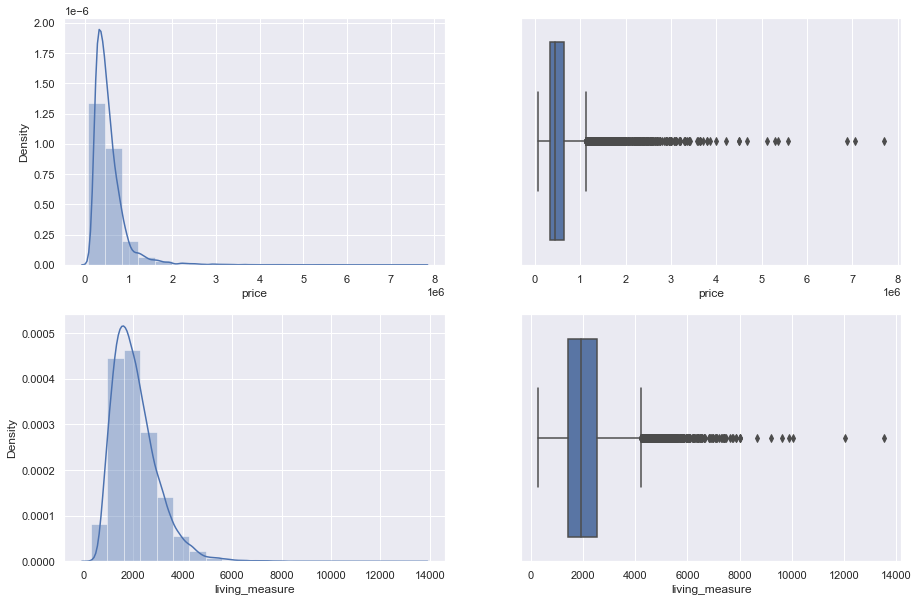

In [32]:
sns.set(rc={'figure.figsize':(15,10)})
fig, axes = plt.subplots(2, 2)
sns.distplot(df['price'],bins=20,ax=axes[0,0] )
sns.boxplot(df['price'],orient="0",ax=axes[0,1])

sns.distplot(df['living_measure'],bins=20,ax=axes[1,0] )
sns.boxplot(df['living_measure'],orient="0",ax=axes[1,1])

<AxesSubplot:xlabel='ceil_measure'>

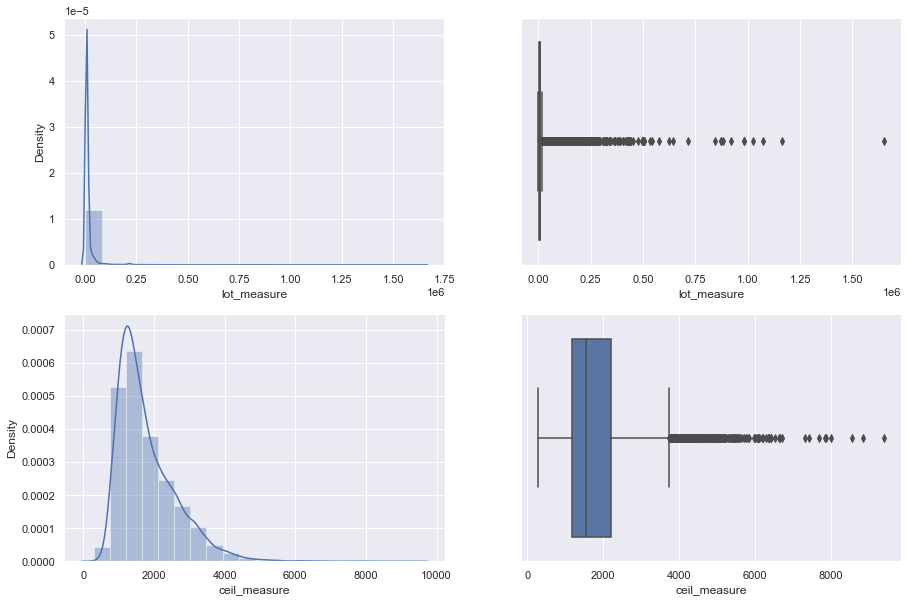

In [33]:
fig, axes = plt.subplots(2, 2)
sns.distplot(df['lot_measure'],bins=20,ax=axes[0,0] )
sns.boxplot(df['lot_measure'],orient="0",ax=axes[0,1])

sns.distplot(df['ceil_measure'],bins=20,ax=axes[1,0] )
sns.boxplot(df['ceil_measure'],orient="0",ax=axes[1,1])

<AxesSubplot:xlabel='lot_measure15'>

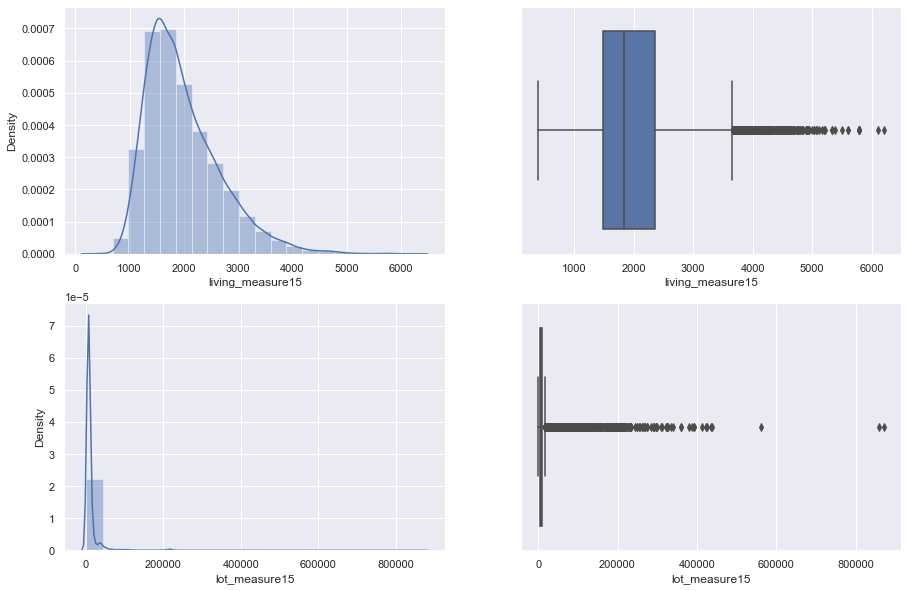

In [34]:
sns.set(rc={'figure.figsize':(15,10)})
fig, axes = plt.subplots(2, 2)
sns.distplot(df['living_measure15'],bins=20,ax=axes[0,0] )
sns.boxplot(df['living_measure15'],orient="0",ax=axes[0,1])

sns.distplot(df['lot_measure15'],bins=20,ax=axes[1,0] )
sns.boxplot(df['lot_measure15'],orient="0",ax=axes[1,1])

<AxesSubplot:xlabel='total_area'>

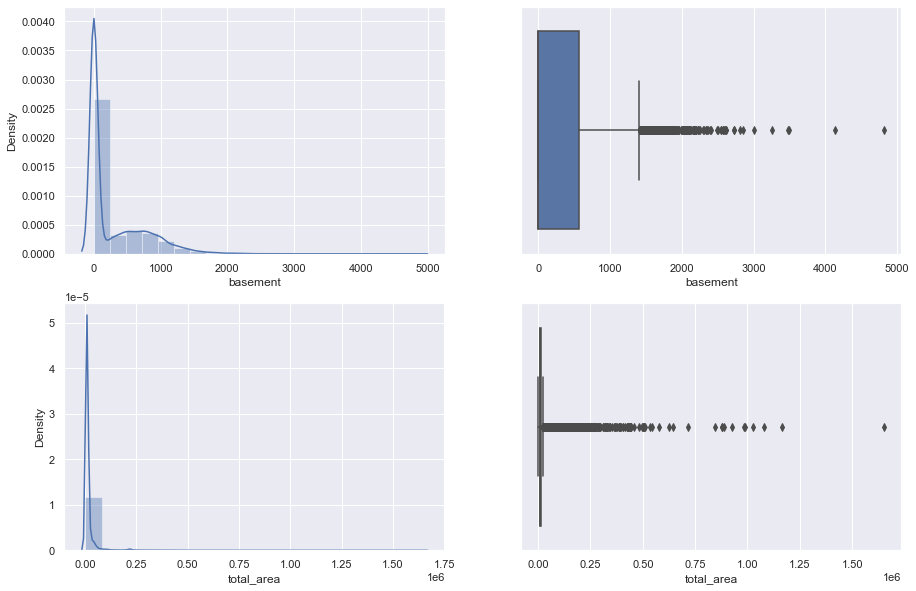

In [35]:
sns.set(rc={'figure.figsize':(15,10)})
fig, axes = plt.subplots(2, 2)
sns.distplot(df['basement'],bins=20,ax=axes[0,0] )
sns.boxplot(df['basement'],orient="0",ax=axes[0,1])

sns.distplot(df['total_area'],bins=20,ax=axes[1,0] )
sns.boxplot(df['total_area'],orient="0",ax=axes[1,1])

<AxesSubplot:xlabel='coast', ylabel='count'>

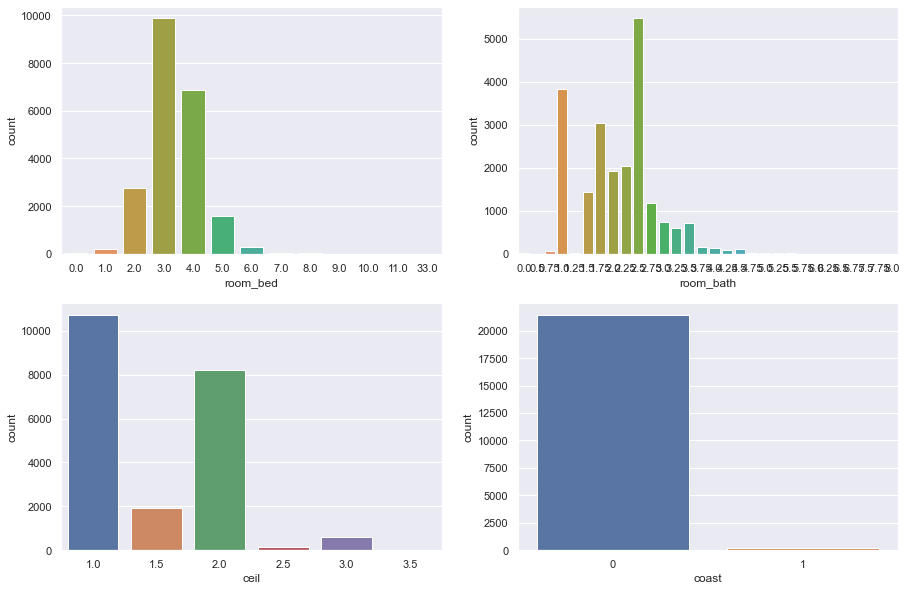

In [36]:
sns.set(rc={'figure.figsize':(15,10)})
fig, axes = plt.subplots(2, 2)
sns.countplot(x="room_bed", data=df,ax=axes[0,0] )
sns.countplot(x="room_bath", data=df,ax=axes[0,1] )


sns.countplot(x="ceil", data=df,ax=axes[1,0] )
sns.countplot(x="coast", data=df,ax=axes[1,1] )



<AxesSubplot:xlabel='furnished', ylabel='count'>

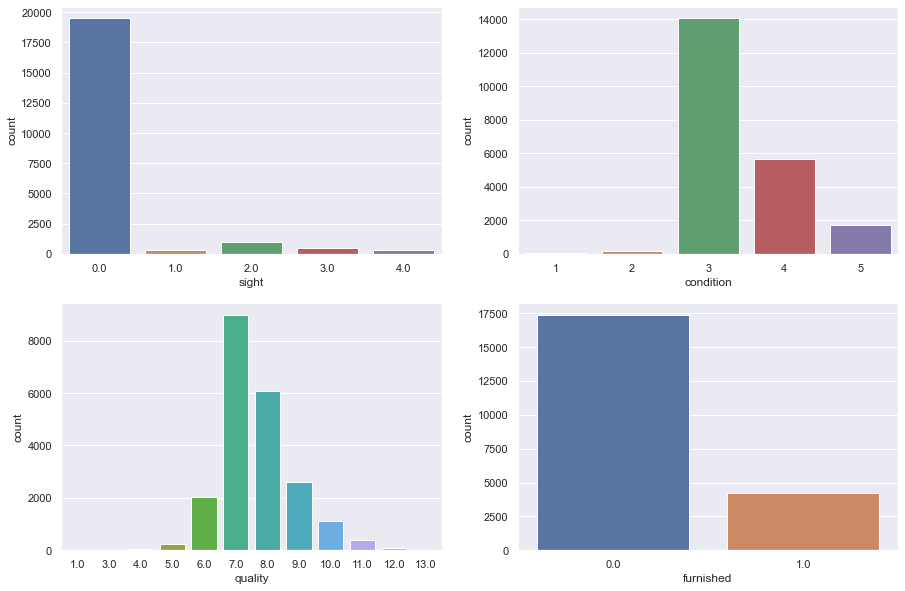

In [37]:
sns.set(rc={'figure.figsize':(15,10)})
fig, axes = plt.subplots(2, 2)
sns.countplot(x="sight", data=df,ax=axes[0,0] )
sns.countplot(x="condition", data=df,ax=axes[0,1] )


sns.countplot(x="quality", data=df,ax=axes[1,0] )
sns.countplot(x="furnished", data=df,ax=axes[1,1] )

# BIVARIATE ANALYSIS

<AxesSubplot:xlabel='price', ylabel='total_area'>

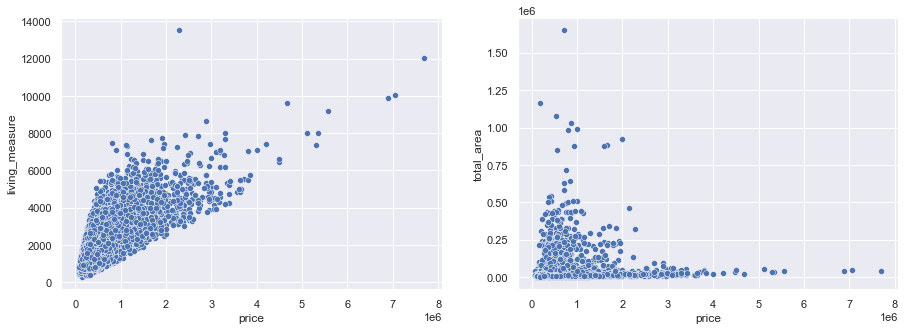

In [38]:
sns.set(rc={'figure.figsize':(15,5)})
fig, axes = plt.subplots(1,2)
sns.scatterplot(df['price'],df['living_measure'],ax=axes[0] )
sns.scatterplot(df['price'],df['total_area'],ax=axes[1])

<AxesSubplot:xlabel='price', ylabel='ceil_measure'>

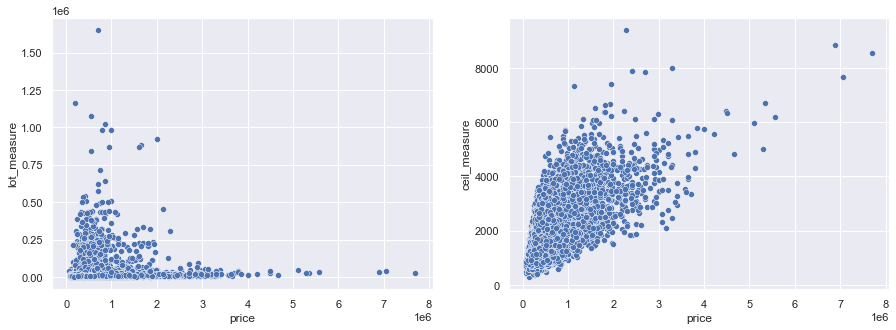

In [39]:
sns.set(rc={'figure.figsize':(15,5)})
fig, axes = plt.subplots(1,2)
sns.scatterplot(df['price'],df['lot_measure'],ax=axes[0] )
sns.scatterplot(df['price'],df['ceil_measure'],ax=axes[1])

<AxesSubplot:xlabel='price', ylabel='lot_measure15'>

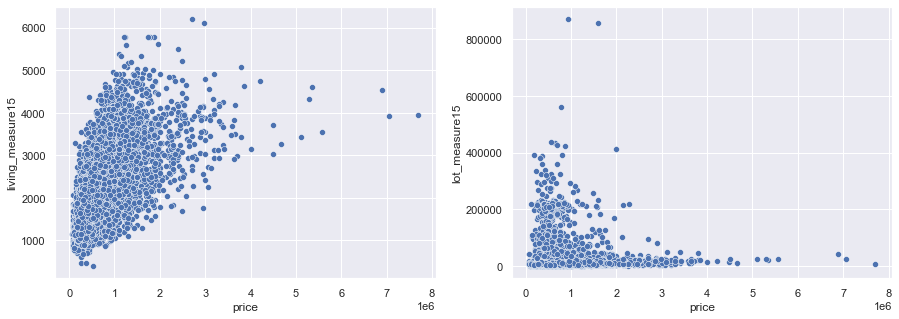

In [40]:
sns.set(rc={'figure.figsize':(15,5)})
fig, axes = plt.subplots(1,2)
sns.scatterplot(df['price'],df['living_measure15'],ax=axes[0] )
sns.scatterplot(df['price'],df['lot_measure15'],ax=axes[1])

<AxesSubplot:xlabel='price', ylabel='total_area'>

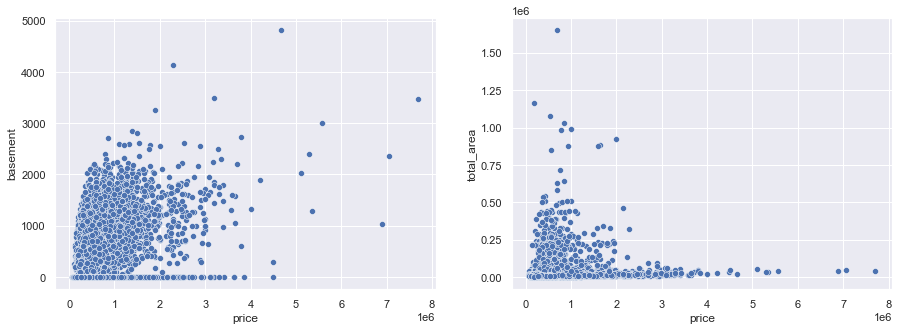

In [41]:
sns.set(rc={'figure.figsize':(15,5)})
fig, axes = plt.subplots(1,2)
sns.scatterplot(df['price'],df['basement'],ax=axes[0] )
sns.scatterplot(df['price'],df['total_area'],ax=axes[1])

<AxesSubplot:xlabel='room_bath', ylabel='price'>

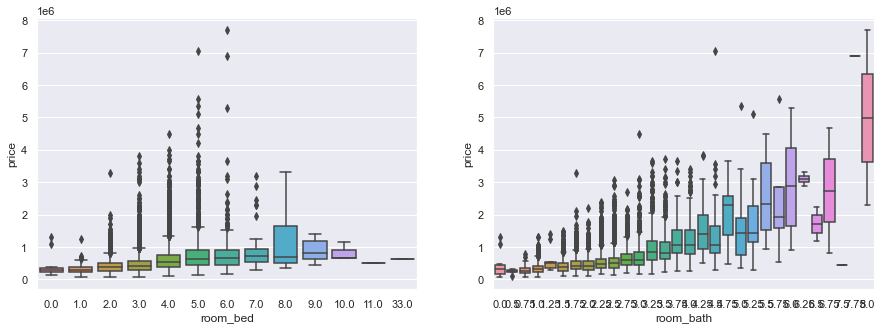

In [42]:
sns.set(rc={'figure.figsize':(15,5)})
fig, axes = plt.subplots(1,2)
sns.boxplot(df['room_bed'],df['price'],ax=axes[0] )
sns.boxplot(df['room_bath'],df['price'],ax=axes[1] )

<AxesSubplot:xlabel='coast', ylabel='price'>

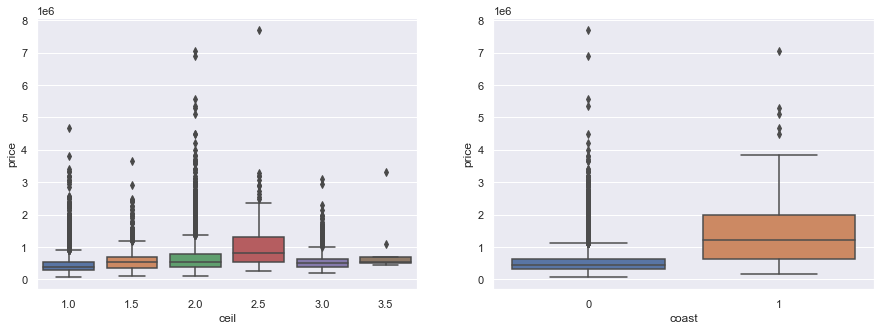

In [43]:
sns.set(rc={'figure.figsize':(15,5)})
fig, axes = plt.subplots(1,2)
sns.boxplot(df['ceil'],df['price'],ax=axes[0] )
sns.boxplot(df['coast'],df['price'],ax=axes[1] )

<AxesSubplot:xlabel='condition', ylabel='price'>

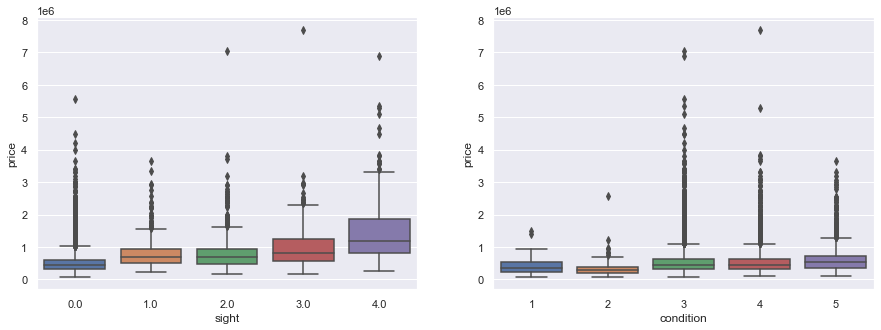

In [44]:
sns.set(rc={'figure.figsize':(15,5)})
fig, axes = plt.subplots(1,2)
sns.boxplot(df['sight'],df['price'],ax=axes[0] )
sns.boxplot(df['condition'],df['price'],ax=axes[1] )

<AxesSubplot:xlabel='furnished', ylabel='price'>

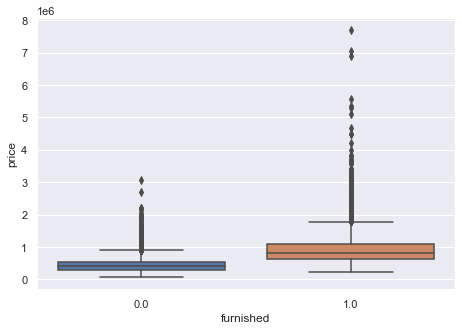

In [45]:
sns.set(rc={'figure.figsize':(7.5,5)})
sns.boxplot(df['furnished'],df['price'])

# Multivariate

In [46]:
continous_df = df[['price', 'living_measure', 'lot_measure', 'ceil_measure',  'living_measure15','basement', 'lot_measure15', 
             'total_area']]


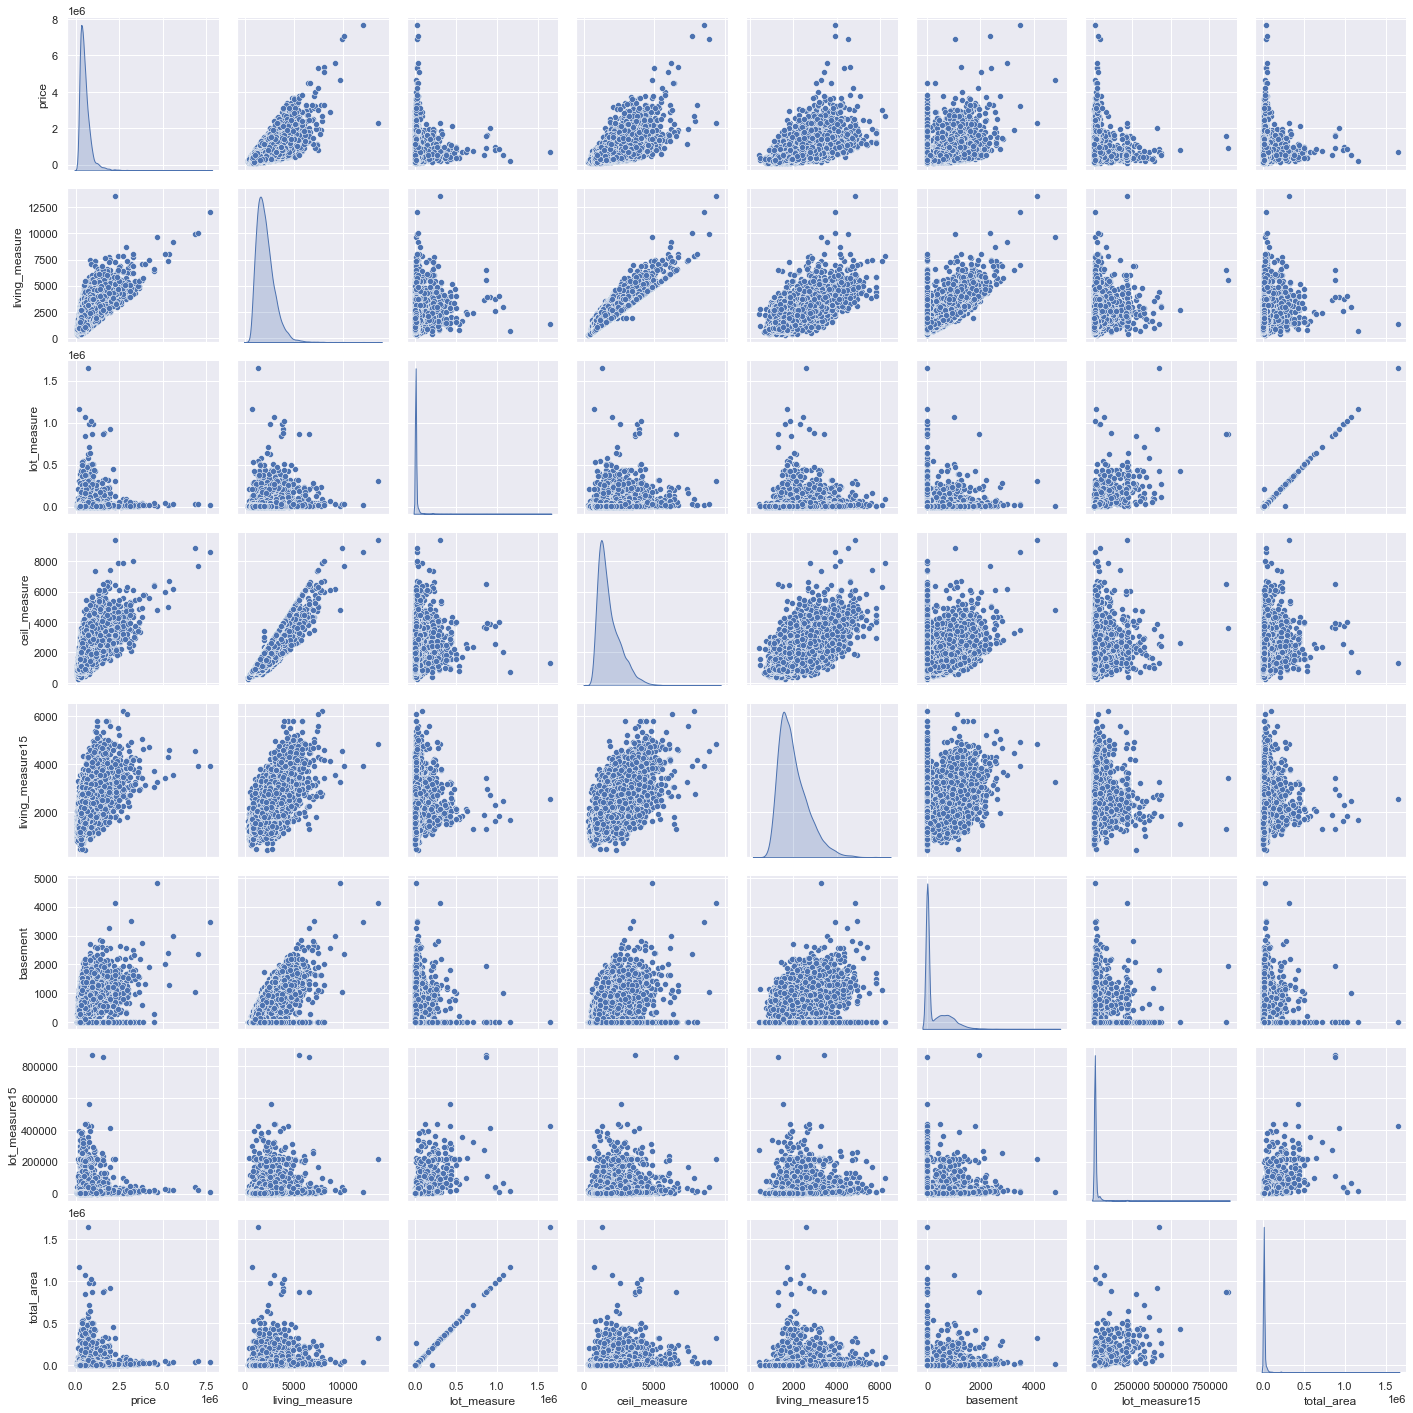

In [47]:
sns.pairplot(continous_df,diag_kind='kde');

In [48]:
continous_df.corr()

,price,living_measure,lot_measure,ceil_measure,living_measure15,basement,lot_measure15,total_area
price,1.000000,0.702066,0.089676,0.605594,0.583825,0.323837,0.082597,0.104849
living_measure,0.702066,1.000000,0.172728,0.876342,0.753594,0.434775,0.183484,0.194168
lot_measure,0.089676,0.172728,1.000000,0.183413,0.145003,0.015364,0.716048,0.998169
ceil_measure,0.605594,0.876342,0.183413,1.000000,0.729391,-0.051916,0.194175,0.202049
living_measure15,0.583825,0.753594,0.145003,0.729391,1.000000,0.199378,0.184007,0.161138
basement,0.323837,0.434775,0.015364,-0.051916,0.199378,1.000000,0.017514,0.025003
lot_measure15,0.082597,0.183484,0.716048,0.194175,0.184007,0.017514,1.000000,0.719271
total_area,0.104849,0.194168,0.998169,0.202049,0.161138,0.025003,0.719271,1.000000


<AxesSubplot:>

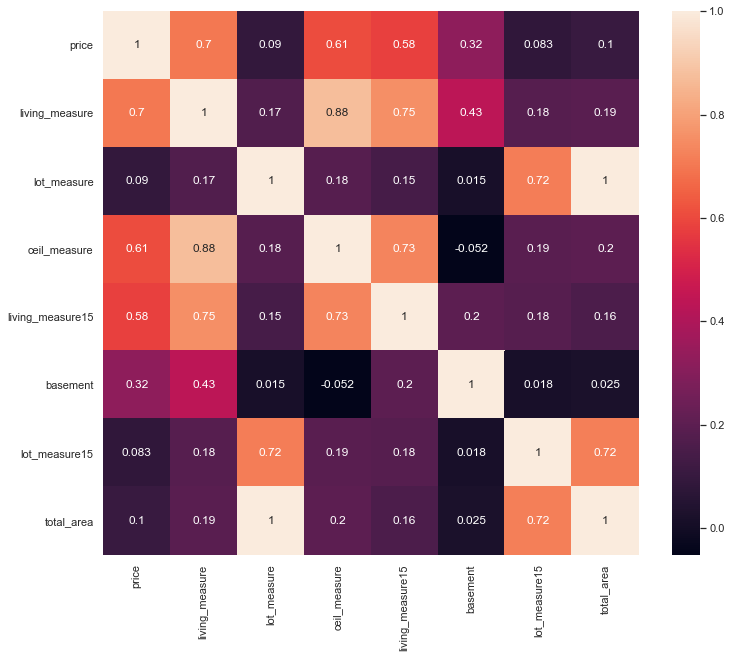

In [49]:
plt.figure(figsize=(12,10))
sns.heatmap(continous_df.corr(),annot=True)

In [50]:
df.drop(columns=['cid'], inplace=True)

In [51]:
df.drop(columns=['dayhours'], inplace=True)

In [52]:
df.drop(columns=['zipcode'], inplace=True)

In [53]:
df.drop(columns=['lat'], inplace=True)

In [54]:
df.drop(columns=['long'], inplace=True)

# Outlier Treatment

<AxesSubplot:>

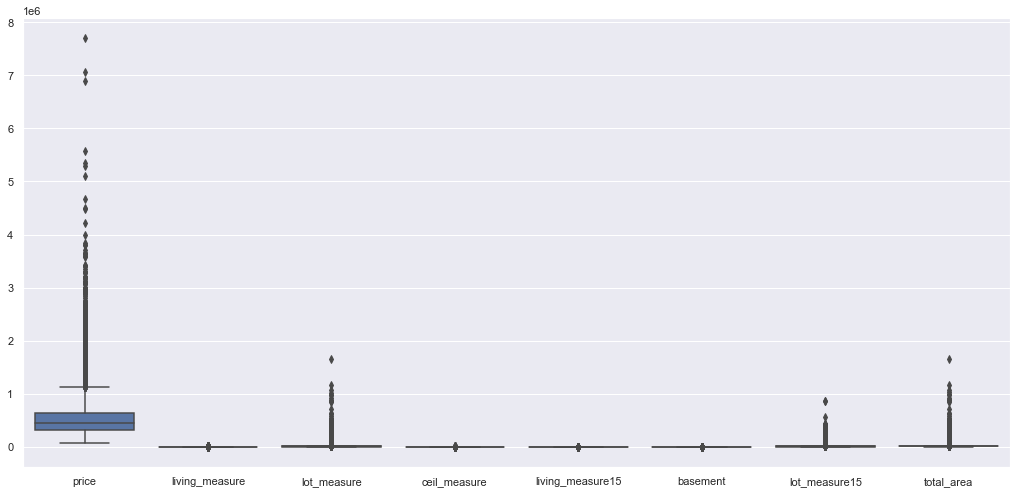

In [55]:
sns.set(rc={'figure.figsize':(17.7,8.27)})
sns.boxplot(data=continous_df,orient="0")

In [56]:
Q1 = continous_df.quantile(0.25)
Q3 = continous_df.quantile(0.75)
IQR = Q3 - Q1
pd.DataFrame((((continous_df < (Q1 - 1.5 * IQR)) | (continous_df > (Q3 + 1.5 * IQR))).sum()/continous_df.shape[0]*100).round(2),columns=['Outliers %'])

,Outliers %
price,5.36
living_measure,2.65
lot_measure,11.22
ceil_measure,2.83
living_measure15,2.50
basement,2.29
lot_measure15,10.14
total_area,11.19


In [57]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [58]:
lminpay,uminpay=remove_outlier(continous_df['price'])
continous_df['price']=np.where(continous_df['price']>uminpay,uminpay,continous_df['price'])
continous_df['price']=np.where(continous_df['price']<lminpay,lminpay,continous_df['price'])

In [59]:
lminpay,uminpay=remove_outlier(continous_df['living_measure'])
continous_df['living_measure']=np.where(continous_df['living_measure']>uminpay,uminpay,continous_df['living_measure'])
continous_df['living_measure']=np.where(continous_df['living_measure']<lminpay,lminpay,continous_df['living_measure'])

In [60]:
lminpay,uminpay=remove_outlier(continous_df['lot_measure'])
continous_df['lot_measure']=np.where(continous_df['lot_measure']>uminpay,uminpay,continous_df['lot_measure'])
continous_df['lot_measure']=np.where(continous_df['lot_measure']<lminpay,lminpay,continous_df['lot_measure'])

In [61]:
lminpay,uminpay=remove_outlier(continous_df['ceil_measure'])
continous_df['ceil_measure']=np.where(continous_df['ceil_measure']>uminpay,uminpay,continous_df['ceil_measure'])
continous_df['ceil_measure']=np.where(continous_df['ceil_measure']<lminpay,lminpay,continous_df['ceil_measure'])

In [62]:
lminpay,uminpay=remove_outlier(continous_df['living_measure15'])
continous_df['living_measure15']=np.where(continous_df['living_measure15']>uminpay,uminpay,continous_df['living_measure15'])
continous_df['living_measure15']=np.where(continous_df['living_measure15']<lminpay,lminpay,continous_df['living_measure15'])

lminpay,uminpay=remove_outlier(continous_df['lot_measure15'])
continous_df['lot_measure15']=np.where(continous_df['lot_measure15']>uminpay,uminpay,continous_df['lot_measure15'])
continous_df['lot_measure15']=np.where(continous_df['lot_measure15']<lminpay,lminpay,continous_df['lot_measure15'])

lminpay,uminpay=remove_outlier(continous_df['total_area'])
continous_df['total_area']=np.where(continous_df['total_area']>uminpay,uminpay,continous_df['total_area'])
continous_df['total_area']=np.where(continous_df['total_area']<lminpay,lminpay,continous_df['total_area'])

In [63]:
lminpay,uminpay=remove_outlier(continous_df['basement'])
continous_df['basement']=np.where(continous_df['basement']>uminpay,uminpay,continous_df['basement'])
continous_df['basement']=np.where(continous_df['basement']<lminpay,lminpay,continous_df['basement'])

In [64]:
Q1 = continous_df.quantile(0.25)
Q3 = continous_df.quantile(0.75)
IQR = Q3 - Q1
pd.DataFrame((((continous_df < (Q1 - 1.5 * IQR)) | (continous_df > (Q3 + 1.5 * IQR))).sum()/continous_df.shape[0]*100).round(2),columns=['Outliers %'])

,Outliers %
price,0.0
living_measure,0.0
lot_measure,0.0
ceil_measure,0.0
living_measure15,0.0
basement,0.0
lot_measure15,0.0
total_area,0.0


<AxesSubplot:>

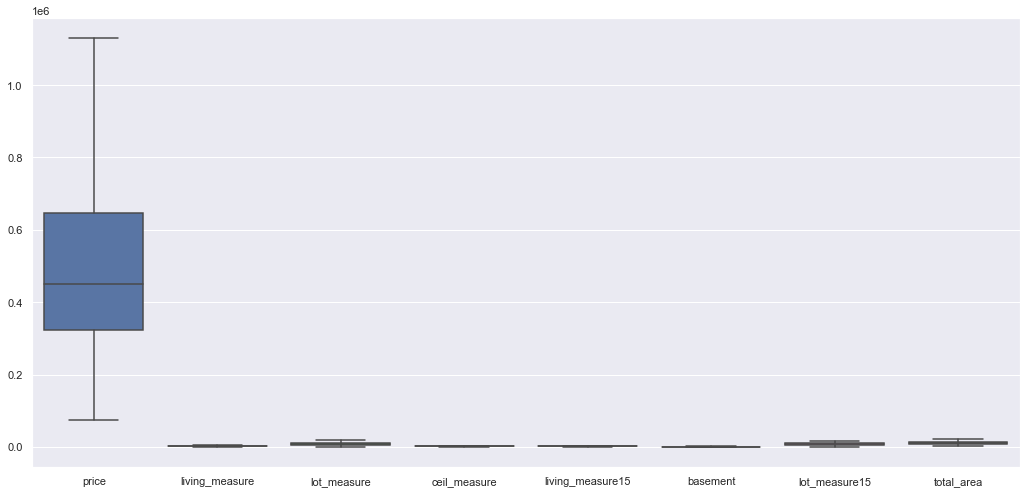

In [65]:
sns.set(rc={'figure.figsize':(17.7,8.27)})
sns.boxplot(data=continous_df,orient="0")

In [66]:
df["price"]=continous_df["price"]
df["living_measure"]=continous_df["living_measure"]
df["lot_measure"]=continous_df["lot_measure"]
df["ceil_measure"]=continous_df["ceil_measure"]
df["living_measure15"]=continous_df["living_measure15"]
df["lot_measure15"]=continous_df["lot_measure15"]
df["basement"]=continous_df["basement"]
df["total_area"]=continous_df["total_area"]

In [67]:
def check_outliers(data):
    vData_num = data.loc[:,data.columns != 'class']
    Q1 = vData_num.quantile(0.25)
    Q3 = vData_num.quantile(0.75)
    IQR = Q3 - Q1
    count = 0
    # checking for outliers, True represents outlier
    vData_num_mod = ((vData_num < (Q1 - 1.5 * IQR)) |(vData_num > (Q3 + 1.5 * IQR)))
    #iterating over columns to check for no.of outliers in each of the numerical attributes.
    for col in vData_num_mod:
        if(1 in vData_num_mod[col].value_counts().index):
            print("No. of outliers in %s: %d" %( col, vData_num_mod[col].value_counts().iloc[1]))
            count += 1
    print("\n\nNo of attributes with outliers are :", count)
    
check_outliers(df)

No. of outliers in room_bed: 542
No. of outliers in room_bath: 569
No. of outliers in coast: 191
No. of outliers in sight: 2119
No. of outliers in condition: 58
No. of outliers in quality: 1911
No. of outliers in yr_built: 14
No. of outliers in yr_renovated: 914
No. of outliers in furnished: 4246


No of attributes with outliers are : 9


# Linear Regression

In [68]:
df.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'yr_built', 'yr_renovated', 'living_measure15',
       'lot_measure15', 'furnished', 'total_area'],
      dtype='object')

In [69]:
import statsmodels.formula.api as SM

# Model 1

In [70]:
f_1 = 'price ~ room_bed+room_bath+living_measure+lot_measure+ceil+coast+sight+condition+quality+ceil_measure+basement+yr_built+yr_renovated+living_measure15+lot_measure15+furnished+total_area'


In [71]:
model_1 = SM.ols(f_1,data=df).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     2259.
Date:                Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:01:13   Log-Likelihood:            -2.8826e+05
No. Observations:               21613   AIC:                         5.766e+05
Df Residuals:                   21595   BIC:                         5.767e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.213e+05   3.86e+04      8.334      0.000    2.46e+05    3.97e+05
room_bed         -9999.6992   1430.422     -6.991      0.000   -1.28e+04   -7195.967
room_bath        -1.257e+04   2267.628     -5.541      0.000    -1.7e+04   -8121.084
living_measure     145.4079     10.604     13.713      0.000     124.624     166.192
lot_measure         -8.9110      2.098     -4.247      0.000     -13.024      -4.798
ceil              9895.9781   2810.734      3.521      0.000    4386.731    1.54e+04
coast             9.888e+04   1.18e+04      8.362      0.000    7.57e+04    1.22e+05
sight             3.457e+04   1548.408     22.328      0.000    3.15e+04    3.76e+04
condition         4.424e+04   1655.392     26.727      0.000     4.1e+04    4.75e+04
quality           7.188e+04   1828.098     39.319      0.000    6.83e+04    7.55e+04
ceil_measure       -61.4523     10.895     -5.640      0.000     -82.808     -40.096
basement           -20.7752     10.684     -1.945      0.052     -41.717       0.166
yr_built          -378.4140     18.819    -20.108      0.000    -415.300    -341.528
yr_renovated        51.0994      2.603     19.627      0.000      45.996      56.202
living_measure15    56.2498      2.721     20.670      0.000      50.916      61.584
lot_measure15       -5.7410      0.576     -9.966      0.000      -6.870      -4.612
furnished          7.12e+04   4326.107     16.458      0.000    6.27e+04    7.97e+04
total_area           7.6483      2.046      3.738      0.000       3.638      11.659
==============================================================================
Omnibus:                      966.332   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1743.535
Skew:                           0.357   Prob(JB):                         0.00
Kurtosis:                       4.194   Cond. No.                     7.01e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [73]:
X = df[['living_measure', 'lot_measure','ceil_measure','living_measure15',
       'lot_measure15', 'total_area']]

In [74]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [75]:
i=0
for column in X.columns:
    if i < 18:
        print (column ,"--->",  vif[i])
        i = i+1

living_measure ---> 47.55193955422341
lot_measure ---> 410.16053887996264
ceil_measure ---> 27.23582084802952
living_measure15 ---> 21.516208497110004
lot_measure15 ---> 26.95658614557027
total_area ---> 562.1750031759167


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21613 non-null  float64
 1   room_bed          21613 non-null  float64
 2   room_bath         21613 non-null  float64
 3   living_measure    21613 non-null  float64
 4   lot_measure       21613 non-null  float64
 5   ceil              21613 non-null  float64
 6   coast             21613 non-null  int64  
 7   sight             21613 non-null  float64
 8   condition         21613 non-null  int64  
 9   quality           21613 non-null  float64
 10  ceil_measure      21613 non-null  float64
 11  basement          21613 non-null  float64
 12  yr_built          21613 non-null  int64  
 13  yr_renovated      21613 non-null  int64  
 14  living_measure15  21613 non-null  float64
 15  lot_measure15     21613 non-null  float64
 16  furnished         21613 non-null  float6

# Model 2 - Dropiing "total area"

In [77]:
f_2 = 'price ~ room_bed+room_bath+living_measure+lot_measure+ceil+coast+sight+condition+quality+ceil_measure+basement+yr_built+yr_renovated+living_measure15+lot_measure15+furnished'


In [78]:
model_2 = SM.ols(f_2,data=df).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     2398.
Date:                Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:01:14   Log-Likelihood:            -2.8827e+05
No. Observations:               21613   AIC:                         5.766e+05
Df Residuals:                   21596   BIC:                         5.767e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.227e+05   3.86e+04      8.368      0.000    2.47e+05    3.98e+05
room_bed         -9929.2001   1430.727     -6.940      0.000   -1.27e+04   -7124.870
room_bath        -1.249e+04   2268.221     -5.507      0.000   -1.69e+04   -8045.531
living_measure     146.9888     10.598     13.869      0.000     126.215     167.762
lot_measure         -1.2891      0.496     -2.598      0.009      -2.262      -0.316
ceil              1.034e+04   2809.077      3.681      0.000    4833.098    1.58e+04
coast             9.837e+04   1.18e+04      8.317      0.000    7.52e+04    1.22e+05
sight             3.469e+04   1548.563     22.401      0.000    3.17e+04    3.77e+04
condition         4.415e+04   1655.696     26.665      0.000    4.09e+04    4.74e+04
quality           7.141e+04   1824.401     39.143      0.000    6.78e+04     7.5e+04
ceil_measure       -56.4897     10.818     -5.222      0.000     -77.693     -35.287
basement           -15.4766     10.593     -1.461      0.144     -36.239       5.286
yr_built          -377.4818     18.823    -20.054      0.000    -414.376    -340.588
yr_renovated        51.1890      2.604     19.657      0.000      46.085      56.293
living_measure15    56.7423      2.719     20.869      0.000      51.413      62.072
lot_measure15       -5.6019      0.575     -9.742      0.000      -6.729      -4.475
furnished         7.128e+04   4327.354     16.471      0.000    6.28e+04    7.98e+04
==============================================================================
Omnibus:                      968.229   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1738.704
Skew:                           0.359   Prob(JB):                         0.00
Kurtosis:                       4.189   Cond. No.                     5.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
X = df[['living_measure', 'lot_measure','ceil_measure','living_measure15',
       'lot_measure15']]

In [80]:
i=0
for column in X.columns:
    if i < 18:
        print (column ,"--->",  vif[i])
        i = i+1

living_measure ---> 47.55193955422341
lot_measure ---> 410.16053887996264
ceil_measure ---> 27.23582084802952
living_measure15 ---> 21.516208497110004
lot_measure15 ---> 26.95658614557027


# Model 3 - Dropping "lot_measure"

In [81]:
f_3 = 'price ~ room_bed+room_bath+living_measure+ceil+coast+sight+condition+quality+ceil_measure+basement+yr_built+yr_renovated+living_measure15+lot_measure15+furnished'


In [82]:
model_3 = SM.ols(f_3,data=df).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     2557.
Date:                Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:01:15   Log-Likelihood:            -2.8827e+05
No. Observations:               21613   AIC:                         5.766e+05
Df Residuals:                   21597   BIC:                         5.767e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.201e+05   3.86e+04      8.301      0.000    2.44e+05    3.96e+05
room_bed         -9926.6165   1430.917     -6.937      0.000   -1.27e+04   -7121.914
room_bath        -1.237e+04   2268.018     -5.453      0.000   -1.68e+04   -7921.623
living_measure     146.4141     10.597     13.816      0.000     125.642     167.186
ceil              1.104e+04   2796.375      3.949      0.000    5561.194    1.65e+04
coast             9.862e+04   1.18e+04      8.337      0.000    7.54e+04    1.22e+05
sight             3.462e+04   1548.559     22.358      0.000    3.16e+04    3.77e+04
condition         4.423e+04   1655.607     26.716      0.000     4.1e+04    4.75e+04
quality           7.149e+04   1824.415     39.184      0.000    6.79e+04    7.51e+04
ceil_measure       -56.9785     10.817     -5.267      0.000     -78.181     -35.776
basement           -15.3525     10.594     -1.449      0.147     -36.118       5.413
yr_built          -376.6597     18.823    -20.011      0.000    -413.554    -339.766
yr_renovated        51.2231      2.604     19.668      0.000      46.118      56.328
living_measure15    56.9360      2.718     20.945      0.000      51.608      62.264
lot_measure15       -6.8977      0.286    -24.106      0.000      -7.459      -6.337
furnished          7.15e+04   4327.051     16.525      0.000     6.3e+04       8e+04
==============================================================================
Omnibus:                      968.535   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1736.277
Skew:                           0.360   Prob(JB):                         0.00
Kurtosis:                       4.188   Cond. No.                     3.81e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
X = df[['living_measure','ceil_measure','living_measure15',
       'lot_measure15']]

In [84]:
i=0
for column in X.columns:
    if i < 18:
        print (column ,"--->",  vif[i])
        i = i+1

living_measure ---> 47.55193955422341
ceil_measure ---> 410.16053887996264
living_measure15 ---> 27.23582084802952
lot_measure15 ---> 21.516208497110004


# Model 4 dropping "ceil_measure"

In [85]:
f_4 = 'price ~ room_bed+room_bath+living_measure+ceil+coast+sight+condition+quality+basement+yr_built+yr_renovated+living_measure15+lot_measure15+furnished'


In [86]:
model_4 = SM.ols(f_4,data=df).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     2734.
Date:                Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:01:15   Log-Likelihood:            -2.8829e+05
No. Observations:               21613   AIC:                         5.766e+05
Df Residuals:                   21598   BIC:                         5.767e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.224e+05   3.86e+04      8.357      0.000    2.47e+05    3.98e+05
room_bed         -1.034e+04   1429.690     -7.229      0.000   -1.31e+04   -7533.618
room_bath        -1.293e+04   2266.911     -5.703      0.000   -1.74e+04   -8485.623
living_measure      92.8889      3.010     30.865      0.000      86.990      98.788
ceil              9095.4203   2773.557      3.279      0.001    3659.045    1.45e+04
coast              9.71e+04   1.18e+04      8.206      0.000    7.39e+04     1.2e+05
sight             3.449e+04   1549.313     22.262      0.000    3.15e+04    3.75e+04
condition         4.436e+04   1656.452     26.780      0.000    4.11e+04    4.76e+04
quality           7.135e+04   1825.354     39.088      0.000    6.78e+04    7.49e+04
basement            37.5953      3.347     11.232      0.000      31.035      44.156
yr_built          -376.5769     18.834    -19.994      0.000    -413.494    -339.660
yr_renovated        51.1380      2.606     19.623      0.000      46.030      56.246
living_measure15    56.2199      2.717     20.695      0.000      50.895      61.545
lot_measure15       -6.9580      0.286    -24.322      0.000      -7.519      -6.397
furnished         7.071e+04   4327.074     16.340      0.000    6.22e+04    7.92e+04
==============================================================================
Omnibus:                      958.613   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1696.465
Skew:                           0.361   Prob(JB):                         0.00
Kurtosis:                       4.168   Cond. No.                     3.75e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
X = df[['living_measure','living_measure15',
       'lot_measure15']]

In [88]:
i=0
for column in X.columns:
    if i < 18:
        print (column ,"--->",  vif[i])
        i = i+1

living_measure ---> 47.55193955422341
living_measure15 ---> 410.16053887996264
lot_measure15 ---> 27.23582084802952


# Model 5 dropping "living_measure15"

In [89]:
f_5 = 'price ~ room_bed+room_bath+living_measure+ceil+coast+sight+condition+quality+basement+yr_built+yr_renovated+lot_measure15+furnished'


In [90]:
model_5 = SM.ols(f_5,data=df).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     2855.
Date:                Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:01:16   Log-Likelihood:            -2.8850e+05
No. Observations:               21613   AIC:                         5.770e+05
Df Residuals:                   21599   BIC:                         5.771e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        3.31e+05    3.9e+04      8.496      0.000    2.55e+05    4.07e+05
room_bed       -1.111e+04   1443.264     -7.700      0.000   -1.39e+04   -8283.772
room_bath      -1.277e+04   2289.210     -5.577      0.000   -1.73e+04   -8280.435
living_measure   117.2288      2.797     41.905      0.000     111.746     122.712
ceil            5423.3239   2795.118      1.940      0.052     -55.313    1.09e+04
coast           8.895e+04   1.19e+04      7.448      0.000    6.55e+04    1.12e+05
sight           3.842e+04   1552.741     24.746      0.000    3.54e+04    4.15e+04
condition       4.278e+04   1670.982     25.603      0.000    3.95e+04    4.61e+04
quality         7.815e+04   1813.171     43.103      0.000    7.46e+04    8.17e+04
basement          27.4382      3.344      8.206      0.000      20.885      33.992
yr_built        -374.3337     19.019    -19.682      0.000    -411.613    -337.054
yr_renovated      47.4984      2.626     18.090      0.000      42.352      52.645
lot_measure15     -5.7252      0.283    -20.261      0.000      -6.279      -5.171
furnished       7.612e+04   4361.662     17.452      0.000    6.76e+04    8.47e+04
==============================================================================
Omnibus:                     1116.001   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2002.834
Skew:                           0.405   Prob(JB):                         0.00
Kurtosis:                       4.252   Cond. No.                     3.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
X = df[['living_measure',
       'lot_measure15']]

In [92]:
i=0
for column in X.columns:
    if i < 18:
        print (column ,"--->",  vif[i])
        i = i+1

living_measure ---> 47.55193955422341
lot_measure15 ---> 410.16053887996264


# Model 6 dropping "ceil"

In [93]:
f_6 = 'price ~ room_bed+room_bath+living_measure+coast+sight+condition+quality+basement+yr_built+yr_renovated+lot_measure15+furnished'


In [94]:
model_6 = SM.ols(f_6,data=df).fit()
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     3092.
Date:                Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:01:17   Log-Likelihood:            -2.8850e+05
No. Observations:               21613   AIC:                         5.770e+05
Df Residuals:                   21600   BIC:                         5.771e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.292e+05   3.89e+04      8.452      0.000    2.53e+05    4.06e+05
room_bed       -1.125e+04   1441.563     -7.806      0.000   -1.41e+04   -8426.680
room_bath      -1.153e+04   2198.687     -5.244      0.000   -1.58e+04   -7220.220
living_measure   118.2792      2.745     43.092      0.000     112.899     123.659
coast            8.92e+04   1.19e+04      7.469      0.000    6.58e+04    1.13e+05
sight           3.849e+04   1552.494     24.791      0.000    3.54e+04    4.15e+04
condition       4.248e+04   1663.824     25.531      0.000    3.92e+04    4.57e+04
quality         7.856e+04   1801.222     43.614      0.000     7.5e+04    8.21e+04
basement          24.4131      2.958      8.253      0.000      18.615      30.211
yr_built        -371.2165     18.953    -19.587      0.000    -408.365    -334.068
yr_renovated      47.5771      2.626     18.121      0.000      42.431      52.723
lot_measure15     -5.9389      0.260    -22.822      0.000      -6.449      -5.429
furnished       7.589e+04   4360.280     17.404      0.000    6.73e+04    8.44e+04
==============================================================================
Omnibus:                     1109.781   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1980.433
Skew:                           0.405   Prob(JB):                         0.00
Kurtosis:                       4.242   Cond. No.                     3.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model 7 dropping "lot_measure15"

In [95]:
f_7 = 'price ~ room_bed+room_bath+living_measure+coast+sight+condition+quality+basement+yr_built+yr_renovated+furnished'


In [96]:
model_7 = SM.ols(f_7,data=df).fit()
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     3247.
Date:                Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:01:17   Log-Likelihood:            -2.8876e+05
No. Observations:               21613   AIC:                         5.775e+05
Df Residuals:                   21601   BIC:                         5.776e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.092e+05   3.94e+04      7.847      0.000    2.32e+05    3.86e+05
room_bed       -1.128e+04   1458.804     -7.731      0.000   -1.41e+04   -8418.749
room_bath      -1957.0508   2184.119     -0.896      0.370   -6238.086    2323.984
living_measure   100.9132      2.669     37.813      0.000      95.682     106.144
coast           7.183e+04   1.21e+04      5.956      0.000    4.82e+04    9.55e+04
sight            3.71e+04   1569.863     23.635      0.000     3.4e+04    4.02e+04
condition       3.898e+04   1676.575     23.252      0.000    3.57e+04    4.23e+04
quality         7.959e+04   1822.197     43.676      0.000     7.6e+04    8.32e+04
basement          29.9378      2.983     10.035      0.000      24.090      35.785
yr_built        -376.2275     19.178    -19.618      0.000    -413.818    -338.637
yr_renovated      46.8042      2.657     17.617      0.000      41.597      52.011
furnished       7.166e+04   4408.457     16.256      0.000     6.3e+04    8.03e+04
==============================================================================
Omnibus:                     1034.016   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1718.105
Skew:                           0.403   Prob(JB):                         0.00
Kurtosis:                       4.121   Cond. No.                     1.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model 8 dropping "room_bath" 

In [97]:
f_8 = 'price ~ room_bed+living_measure+basement+yr_built+yr_renovated+living_measure15+lot_measure15+furnished'

In [98]:
model_8 = SM.ols(f_8,data=df).fit()
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     3807.
Date:                Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:01:18   Log-Likelihood:            -2.8980e+05
No. Observations:               21613   AIC:                         5.796e+05
Df Residuals:                   21604   BIC:                         5.797e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         9.309e+05   3.85e+04     24.177      0.000    8.55e+05    1.01e+06
room_bed         -1.743e+04   1496.734    -11.642      0.000   -2.04e+04   -1.45e+04
living_measure     127.4280      2.732     46.643      0.000     122.073     132.783
basement            51.0986      3.037     16.825      0.000      45.146      57.051
yr_built          -394.0429     19.613    -20.091      0.000    -432.486    -355.599
yr_renovated        50.8319      2.766     18.381      0.000      45.411      56.253
living_measure15    81.2416      2.833     28.676      0.000      75.689      86.795
lot_measure15       -7.1168      0.276    -25.798      0.000      -7.658      -6.576
furnished         1.687e+05   3866.433     43.642      0.000    1.61e+05    1.76e+05
==============================================================================
Omnibus:                      819.724   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1276.593
Skew:                           0.354   Prob(JB):                    6.19e-278
Kurtosis:                       3.958   Cond. No.                     3.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
train, test = train_test_split(df, test_size=0.30 , random_state=0)

In [101]:
f_train_1 = 'price ~ room_bed+room_bath+living_measure+lot_measure+ceil+coast+sight+condition+quality+ceil_measure+basement+yr_built+yr_renovated+living_measure15+lot_measure15+furnished+total_area'


In [102]:
model_train_1 = SM.ols(f_train_1,data=train).fit()
model_train_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     1573.
Date:                Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:01:18   Log-Likelihood:            -2.0180e+05
No. Observations:               15129   AIC:                         4.036e+05
Df Residuals:                   15111   BIC:                         4.038e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.576e+05   4.15e+04      3.802      0.000    7.64e+04    2.39e+05
room_bed         -1.185e+04   1777.468     -6.669      0.000   -1.53e+04   -8369.768
room_bath        -1.465e+04   2714.014     -5.398      0.000      -2e+04   -9330.076
living_measure     141.1926     12.679     11.136      0.000     116.341     166.044
lot_measure         -8.8984      2.529     -3.518      0.000     -13.856      -3.941
ceil              8194.8134   3352.011      2.445      0.015    1624.466    1.48e+04
coast             1.087e+05   1.46e+04      7.465      0.000    8.02e+04    1.37e+05
sight             3.508e+04   1845.309     19.009      0.000    3.15e+04    3.87e+04
condition         4.698e+04   1968.943     23.861      0.000    4.31e+04    5.08e+04
quality           7.356e+04   2180.379     33.735      0.000    6.93e+04    7.78e+04
ceil_measure       -55.1607     13.025     -4.235      0.000     -80.691     -29.630
basement           -17.0709     12.739     -1.340      0.180     -42.040       7.898
yr_built          -302.3527     19.896    -15.197      0.000    -341.352    -263.354
yr_renovated        58.2385      3.116     18.689      0.000      52.130      64.346
living_measure15    57.9227      3.247     17.840      0.000      51.559      64.287
lot_measure15       -6.0188      0.692     -8.704      0.000      -7.374      -4.663
furnished         6.302e+04   5184.865     12.154      0.000    5.29e+04    7.32e+04
total_area           7.7484      2.463      3.146      0.002       2.921      12.576
==============================================================================
Omnibus:                      654.764   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1010.688
Skew:                           0.394   Prob(JB):                    3.40e-220
Kurtosis:                       3.991   Cond. No.                     6.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:
Y_train_1_pred = model_train_1.predict(test)
Y_train_1_pred

17384    431063.676343
722      531045.970945
2680     452209.715367
18754    335917.297259
14554    203640.117955
             ...      
18588    366889.039221
6784     425160.751164
14510    650105.171828
18917    408722.786151
11750    664967.249109
Length: 6484, dtype: float64

In [104]:
model_test_1 = SM.ols(f_train_1,data=test).fit()
model_test_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     713.7
Date:                Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:01:19   Log-Likelihood:                -86369.
No. Observations:                6484   AIC:                         1.728e+05
Df Residuals:                    6466   BIC:                         1.729e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.658e+06   1.14e+05     14.574      0.000    1.43e+06    1.88e+06
room_bed         -7651.3449   2382.434     -3.212      0.001   -1.23e+04   -2980.986
room_bath          479.0998   4130.988      0.116      0.908   -7619.004    8577.204
living_measure     153.4226     19.165      8.005      0.000     115.853     190.992
lot_measure        -10.1460      3.724     -2.725      0.006     -17.446      -2.846
ceil              1.904e+04   5120.399      3.719      0.000    9005.876    2.91e+04
coast             8.451e+04   2.01e+04      4.201      0.000    4.51e+04    1.24e+05
sight             3.127e+04   2822.396     11.080      0.000    2.57e+04    3.68e+04
condition          3.28e+04   3047.120     10.763      0.000    2.68e+04    3.88e+04
quality           7.143e+04   3331.204     21.443      0.000    6.49e+04     7.8e+04
ceil_measure       -76.8048     19.691     -3.901      0.000    -115.405     -38.204
basement           -33.5991     19.431     -1.729      0.084     -71.690       4.491
yr_built         -1053.0534     57.997    -18.157      0.000   -1166.746    -939.361
yr_renovated        23.8904      4.776      5.002      0.000      14.528      33.253
living_measure15    52.8061      4.941     10.687      0.000      43.120      62.492
lot_measure15       -4.6952      1.031     -4.554      0.000      -6.716      -2.674
furnished         8.579e+04   7783.468     11.022      0.000    7.05e+04    1.01e+05
total_area           8.6059      3.641      2.363      0.018       1.468      15.744
==============================================================================
Omnibus:                      975.427   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15963.862
Skew:                          -0.065   Prob(JB):                         0.00
Kurtosis:                      10.686   Cond. No.                     1.15e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
from sklearn import metrics

In [106]:
RMSE_Train_1 = np.round(np.sqrt(metrics.mean_squared_error(train['price'],model_train_1.fittedvalues)),2)
RMSE_Test_1 = np.round(np.sqrt(metrics.mean_squared_error(test['price'],Y_train_1_pred)),2)

In [107]:
print('The RMSE of the training data of Model 1 is',RMSE_Train_1,'\nThe RMSE of the test data of Model 1 is',RMSE_Test_1)

The RMSE of the training data of Model 1 is 150214.22 
The RMSE of the test data of Model 1 is 149890.35


# Model 2

In [108]:
f_train_2 = 'price ~ room_bed+room_bath+living_measure+lot_measure+ceil+coast+sight+condition+quality+ceil_measure+basement+yr_built+yr_renovated+living_measure15+lot_measure15+furnished'


In [109]:
model_train_2 = SM.ols(f_train_2,data=train).fit()
model_train_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     1670.
Date:                Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:01:20   Log-Likelihood:            -2.0181e+05
No. Observations:               15129   AIC:                         4.036e+05
Df Residuals:                   15112   BIC:                         4.038e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.591e+05   4.15e+04      3.837      0.000    7.78e+04     2.4e+05
room_bed         -1.179e+04   1777.886     -6.633      0.000   -1.53e+04   -8308.303
room_bath        -1.458e+04   2714.724     -5.371      0.000   -1.99e+04   -9259.708
living_measure     143.4890     12.661     11.333      0.000     118.671     168.307
lot_measure         -1.1653      0.596     -1.956      0.050      -2.333       0.002
ceil              8618.2030   3350.294      2.572      0.010    2051.221    1.52e+04
coast             1.077e+05   1.46e+04      7.395      0.000    7.91e+04    1.36e+05
sight             3.514e+04   1845.733     19.041      0.000    3.15e+04    3.88e+04
condition         4.691e+04   1969.395     23.819      0.000     4.3e+04    5.08e+04
quality           7.314e+04   2177.028     33.596      0.000    6.89e+04    7.74e+04
ceil_measure       -50.8227     12.955     -3.923      0.000     -76.217     -25.428
basement           -12.3811     12.655     -0.978      0.328     -37.186      12.424
yr_built          -301.6290     19.901    -15.157      0.000    -340.637    -262.621
yr_renovated        58.2388      3.117     18.684      0.000      52.129      64.349
living_measure15    58.4255      3.244     18.012      0.000      52.067      64.784
lot_measure15       -5.8929      0.691     -8.534      0.000      -7.247      -4.539
furnished         6.299e+04   5186.381     12.144      0.000    5.28e+04    7.32e+04
==============================================================================
Omnibus:                      656.140   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1009.438
Skew:                           0.396   Prob(JB):                    6.36e-220
Kurtosis:                       3.988   Cond. No.                     4.81e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [110]:
Y_train_2_pred = model_train_2.predict(test)
Y_train_2_pred

17384    432110.978428
722      530726.080182
2680     452295.070674
18754    336337.196743
14554    205338.026061
             ...      
18588    367978.189926
6784     420479.509145
14510    650068.759113
18917    409744.243579
11750    664837.961992
Length: 6484, dtype: float64

In [111]:
model_test_2 = SM.ols(f_train_2,data=test).fit()
model_test_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     757.5
Date:                Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:01:20   Log-Likelihood:                -86372.
No. Observations:                6484   AIC:                         1.728e+05
Df Residuals:                    6467   BIC:                         1.729e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.655e+06   1.14e+05     14.550      0.000    1.43e+06    1.88e+06
room_bed         -7538.3796   2382.799     -3.164      0.002   -1.22e+04   -2867.306
room_bath          539.8535   4132.373      0.131      0.896   -7560.964    8640.671
living_measure     153.5062     19.172      8.007      0.000     115.924     191.089
lot_measure         -1.5981      0.887     -1.801      0.072      -3.337       0.141
ceil              1.959e+04   5116.982      3.828      0.000    9559.369    2.96e+04
coast             8.476e+04   2.01e+04      4.211      0.000    4.53e+04    1.24e+05
sight             3.153e+04   2821.230     11.178      0.000     2.6e+04    3.71e+04
condition         3.265e+04   3047.547     10.713      0.000    2.67e+04    3.86e+04
quality           7.074e+04   3319.325     21.310      0.000    6.42e+04    7.72e+04
ceil_measure       -69.5294     19.456     -3.574      0.000    -107.669     -31.390
basement           -25.9559     19.166     -1.354      0.176     -63.528      11.617
yr_built         -1049.4991     57.998    -18.096      0.000   -1163.194    -935.804
yr_renovated        24.2532      4.775      5.079      0.000      14.892      33.614
living_measure15    53.3785      4.937     10.812      0.000      43.701      63.056
lot_measure15       -4.5034      1.028     -4.380      0.000      -6.519      -2.488
furnished         8.617e+04   7784.571     11.069      0.000    7.09e+04    1.01e+05
==============================================================================
Omnibus:                      968.057   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15630.269
Skew:                          -0.058   Prob(JB):                         0.00
Kurtosis:                      10.605   Cond. No.                     8.74e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [112]:
RMSE_Train_2 = np.round(np.sqrt(metrics.mean_squared_error(train['price'],model_train_2.fittedvalues)),2)
RMSE_Test_2 = np.round(np.sqrt(metrics.mean_squared_error(test['price'],Y_train_2_pred)),2)

In [113]:
print('The RMSE of the training data of Model 2 is',RMSE_Train_2,'\nThe RMSE of the test data of Model 2 is',RMSE_Test_2)

The RMSE of the training data of Model 2 is 150263.41 
The RMSE of the test data of Model 2 is 149933.91


# Model 3

In [114]:
f_train_3 = 'price ~ room_bed+room_bath+living_measure+ceil+coast+sight+condition+quality+ceil_measure+basement+yr_built+yr_renovated+living_measure15+lot_measure15+furnished'


In [115]:
model_train_3 = SM.ols(f_train_3,data=train).fit()
model_train_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     1781.
Date:                Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:01:21   Log-Likelihood:            -2.0181e+05
No. Observations:               15129   AIC:                         4.036e+05
Df Residuals:                   15113   BIC:                         4.038e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          1.57e+05   4.15e+04      3.787      0.000    7.58e+04    2.38e+05
room_bed          -1.18e+04   1778.046     -6.638      0.000   -1.53e+04   -8317.008
room_bath        -1.449e+04   2714.559     -5.337      0.000   -1.98e+04   -9166.761
living_measure     143.1357     12.661     11.305      0.000     118.318     167.953
ceil              9253.6361   3334.820      2.775      0.006    2716.986    1.58e+04
coast             1.079e+05   1.46e+04      7.409      0.000    7.94e+04    1.36e+05
sight             3.507e+04   1845.551     19.004      0.000    3.15e+04    3.87e+04
condition         4.699e+04   1969.160     23.863      0.000    4.31e+04    5.08e+04
quality           7.318e+04   2177.130     33.614      0.000    6.89e+04    7.74e+04
ceil_measure       -51.4403     12.953     -3.971      0.000     -76.829     -26.051
basement           -12.4044     12.656     -0.980      0.327     -37.212      12.403
yr_built          -300.9826     19.900    -15.125      0.000    -339.989    -261.976
yr_renovated        58.3347      3.117     18.715      0.000      52.225      64.444
living_measure15    58.6846      3.241     18.105      0.000      52.331      65.038
lot_measure15       -7.0670      0.342    -20.693      0.000      -7.736      -6.398
furnished         6.323e+04   5185.391     12.193      0.000    5.31e+04    7.34e+04
==============================================================================
Omnibus:                      656.819   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1010.255
Skew:                           0.396   Prob(JB):                    4.23e-220
Kurtosis:                       3.988   Cond. No.                     3.43e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [116]:
Y_train_3_pred = model_train_3.predict(test)
Y_train_3_pred

17384    430599.609629
722      531820.455518
2680     452357.657023
18754    335531.856010
14554    202857.257338
             ...      
18588    369072.983075
6784     421977.180351
14510    649104.241824
18917    406227.229177
11750    663724.850428
Length: 6484, dtype: float64

In [117]:
model_test_3 = SM.ols(f_train_3,data=test).fit()
model_test_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     807.5
Date:                Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:01:21   Log-Likelihood:                -86373.
No. Observations:                6484   AIC:                         1.728e+05
Df Residuals:                    6468   BIC:                         1.729e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          1.65e+06   1.14e+05     14.503      0.000    1.43e+06    1.87e+06
room_bed         -7505.5100   2383.142     -3.149      0.002   -1.22e+04   -2833.763
room_bath          750.0599   4131.441      0.182      0.856   -7348.931    8849.050
living_measure     152.2682     19.163      7.946      0.000     114.703     189.833
ceil              2.045e+04   5095.374      4.014      0.000    1.05e+04    3.04e+04
coast             8.508e+04   2.01e+04      4.227      0.000    4.56e+04    1.25e+05
sight             3.149e+04   2821.615     11.161      0.000     2.6e+04     3.7e+04
condition         3.275e+04   3047.511     10.748      0.000    2.68e+04    3.87e+04
quality           7.091e+04   3318.423     21.370      0.000    6.44e+04    7.74e+04
ceil_measure       -69.5779     19.459     -3.576      0.000    -107.724     -31.432
basement           -25.3661     19.167     -1.323      0.186     -62.940      12.207
yr_built         -1047.4840     57.997    -18.061      0.000   -1161.177    -933.791
yr_renovated        24.1034      4.775      5.048      0.000      14.742      33.464
living_measure15    53.3459      4.938     10.804      0.000      43.666      63.025
lot_measure15       -6.1019      0.519    -11.752      0.000      -7.120      -5.084
furnished         8.632e+04   7785.444     11.088      0.000    7.11e+04    1.02e+05
==============================================================================
Omnibus:                      962.995   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15393.253
Skew:                          -0.055   Prob(JB):                         0.00
Kurtosis:                      10.547   Cond. No.                     6.22e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [118]:
RMSE_Train_3 = np.round(np.sqrt(metrics.mean_squared_error(train['price'],model_train_3.fittedvalues)),2)
RMSE_Test_3 = np.round(np.sqrt(metrics.mean_squared_error(test['price'],Y_train_3_pred)),2)

In [119]:
print('The RMSE of the training data of Model 3 is',RMSE_Train_3,'\nThe RMSE of the test data of Model 3 is',RMSE_Test_3)

The RMSE of the training data of Model 3 is 150282.43 
The RMSE of the test data of Model 3 is 149967.77


# Model 4

In [120]:
f_train_4 = 'price ~ room_bed+room_bath+living_measure+ceil+coast+sight+condition+quality+basement+yr_built+yr_renovated+living_measure15+lot_measure15+furnished'



In [121]:
model_train_4 = SM.ols(f_train_4,data=train).fit()
model_train_4.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     1905.
Date:                Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:01:22   Log-Likelihood:            -2.0182e+05
No. Observations:               15129   AIC:                         4.037e+05
Df Residuals:                   15114   BIC:                         4.038e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.597e+05   4.15e+04      3.850      0.000    7.84e+04    2.41e+05
room_bed         -1.222e+04   1775.729     -6.884      0.000   -1.57e+04   -8743.966
room_bath        -1.499e+04   2712.983     -5.524      0.000   -2.03e+04   -9668.116
living_measure      94.9322      3.605     26.335      0.000      87.866     101.998
ceil              7457.2293   3305.613      2.256      0.024     977.828    1.39e+04
coast             1.073e+05   1.46e+04      7.366      0.000    7.88e+04    1.36e+05
sight             3.498e+04   1846.307     18.946      0.000    3.14e+04    3.86e+04
condition         4.703e+04   1970.101     23.869      0.000    4.32e+04    5.09e+04
quality           7.307e+04   2178.014     33.549      0.000    6.88e+04    7.73e+04
basement            35.3032      3.985      8.860      0.000      27.493      43.114
yr_built          -301.0585     19.910    -15.121      0.000    -340.084    -262.033
yr_renovated        58.2932      3.118     18.693      0.000      52.181      64.406
living_measure15    57.9729      3.238     17.904      0.000      51.626      64.320
lot_measure15       -7.1183      0.341    -20.848      0.000      -7.788      -6.449
furnished          6.24e+04   5183.781     12.038      0.000    5.22e+04    7.26e+04
==============================================================================
Omnibus:                      650.442   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              990.805
Skew:                           0.396   Prob(JB):                    7.07e-216
Kurtosis:                       3.972   Cond. No.                     3.37e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [122]:
Y_train_4_pred = model_train_4.predict(test)
Y_train_4_pred

17384    430250.498077
722      531067.167555
2680     450147.989281
18754    337960.230971
14554    202910.745295
             ...      
18588    368969.902616
6784     421644.348358
14510    649838.276092
18917    406083.345468
11750    663799.262210
Length: 6484, dtype: float64

In [123]:
model_test_4 = SM.ols(f_train_4,data=test).fit()
model_test_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     862.7
Date:                Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:01:22   Log-Likelihood:                -86380.
No. Observations:                6484   AIC:                         1.728e+05
Df Residuals:                    6469   BIC:                         1.729e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.649e+06   1.14e+05     14.479      0.000    1.43e+06    1.87e+06
room_bed         -7883.8602   2382.959     -3.308      0.001   -1.26e+04   -3212.471
room_bath           23.4629   4130.197      0.006      0.995   -8073.090    8120.015
living_measure      86.5496      5.426     15.951      0.000      75.913      97.187
ceil              1.821e+04   5061.075      3.597      0.000    8285.095    2.81e+04
coast              8.14e+04   2.01e+04      4.045      0.000     4.2e+04    1.21e+05
sight             3.124e+04   2823.288     11.064      0.000    2.57e+04    3.68e+04
condition         3.317e+04   3048.082     10.882      0.000    2.72e+04    3.91e+04
quality           7.071e+04   3320.940     21.292      0.000    6.42e+04    7.72e+04
basement            39.6021      6.107      6.485      0.000      27.630      51.574
yr_built         -1045.7288     58.048    -18.015      0.000   -1159.521    -931.936
yr_renovated        23.9345      4.779      5.008      0.000      14.565      33.304
living_measure15    52.6620      4.938     10.664      0.000      42.981      62.343
lot_measure15       -6.1845      0.519    -11.911      0.000      -7.202      -5.167
furnished         8.567e+04   7790.379     10.997      0.000    7.04e+04    1.01e+05
==============================================================================
Omnibus:                      953.717   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14965.256
Skew:                          -0.050   Prob(JB):                         0.00
Kurtosis:                      10.442   Cond. No.                     6.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [124]:
RMSE_Train_4 = np.round(np.sqrt(metrics.mean_squared_error(train['price'],model_train_4.fittedvalues)),2)
RMSE_Test_4 = np.round(np.sqrt(metrics.mean_squared_error(test['price'],Y_train_4_pred)),2)

print('The RMSE of the training data of Model 4 is',RMSE_Train_4,'\nThe RMSE of the test data of Model 4 is',RMSE_Test_4)

The RMSE of the training data of Model 4 is 150360.83 
The RMSE of the test data of Model 4 is 150106.37


# Model 5

In [125]:
f_train_5 = 'price ~ room_bed+room_bath+living_measure+ceil+coast+sight+condition+quality+basement+yr_built+yr_renovated+lot_measure15+furnished'



In [126]:
model_train_5 = SM.ols(f_train_5,data=train).fit()
model_train_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     1985.
Date:                Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:01:23   Log-Likelihood:            -2.0198e+05
No. Observations:               15129   AIC:                         4.040e+05
Df Residuals:                   15115   BIC:                         4.041e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.693e+05   4.19e+04      4.040      0.000    8.72e+04    2.51e+05
room_bed       -1.296e+04   1793.926     -7.223      0.000   -1.65e+04   -9440.921
room_bath      -1.484e+04   2741.500     -5.415      0.000   -2.02e+04   -9470.650
living_measure   119.5947      3.366     35.527      0.000     112.996     126.193
ceil            3891.0659   3334.304      1.167      0.243   -2644.574    1.04e+04
coast           1.002e+05   1.47e+04      6.808      0.000    7.13e+04    1.29e+05
sight           3.912e+04   1851.036     21.134      0.000    3.55e+04    4.27e+04
condition       4.511e+04   1987.892     22.694      0.000    4.12e+04     4.9e+04
quality         8.013e+04   2164.515     37.021      0.000    7.59e+04    8.44e+04
basement          25.1266      3.985      6.305      0.000      17.315      32.939
yr_built        -298.8556     20.119    -14.855      0.000    -338.290    -259.421
yr_renovated      54.4061      3.144     17.307      0.000      48.244      60.568
lot_measure15     -5.7994      0.337    -17.214      0.000      -6.460      -5.139
furnished       6.872e+04   5226.133     13.150      0.000    5.85e+04     7.9e+04
==============================================================================
Omnibus:                      776.917   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1232.455
Skew:                           0.440   Prob(JB):                    2.38e-268
Kurtosis:                       4.087   Cond. No.                     3.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [127]:
Y_train_5_pred = model_train_5.predict(test)
Y_train_5_pred

17384    406431.065206
722      553126.593834
2680     452357.778019
18754    372637.527820
14554    199920.045463
             ...      
18588    345921.608459
6784     423497.301725
14510    647023.285349
18917    386682.697096
11750    657782.152253
Length: 6484, dtype: float64

In [128]:
model_test_5 = SM.ols(f_train_5,data=test).fit()
model_test_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     904.5
Date:                Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:01:23   Log-Likelihood:                -86436.
No. Observations:                6484   AIC:                         1.729e+05
Df Residuals:                    6470   BIC:                         1.730e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.652e+06   1.15e+05     14.389      0.000    1.43e+06    1.88e+06
room_bed       -8757.8514   2402.204     -3.646      0.000   -1.35e+04   -4048.736
room_bath        193.5895   4165.987      0.046      0.963   -7973.122    8360.301
living_measure   110.2301      4.994     22.073      0.000     100.441     120.020
ceil            1.428e+04   5091.430      2.804      0.005    4297.460    2.43e+04
coast           7.217e+04   2.03e+04      3.559      0.000    3.24e+04    1.12e+05
sight           3.479e+04   2827.833     12.304      0.000    2.93e+04    4.03e+04
condition       3.233e+04   3073.501     10.520      0.000    2.63e+04    3.84e+04
quality         7.698e+04   3296.731     23.351      0.000    7.05e+04    8.34e+04
basement          29.5316      6.086      4.852      0.000      17.601      41.462
yr_built       -1042.0777     58.550    -17.798      0.000   -1156.855    -927.300
yr_renovated      20.8497      4.812      4.333      0.000      11.417      30.283
lot_measure15     -5.1359      0.514     -9.988      0.000      -6.144      -4.128
furnished       8.922e+04   7850.762     11.365      0.000    7.38e+04    1.05e+05
==============================================================================
Omnibus:                      905.282   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12868.755
Skew:                           0.017   Prob(JB):                         0.00
Kurtosis:                       9.902   Cond. No.                     6.02e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [129]:
RMSE_Train_5 = np.round(np.sqrt(metrics.mean_squared_error(train['price'],model_train_5.fittedvalues)),2)
RMSE_Test_5 = np.round(np.sqrt(metrics.mean_squared_error(test['price'],Y_train_5_pred)),2)

print('The RMSE of the training data of Model 5 is',RMSE_Train_5,'\nThe RMSE of the test data of Model 5 is',RMSE_Test_5)

The RMSE of the training data of Model 5 is 151946.99 
The RMSE of the test data of Model 5 is 151327.21


# Model 6

In [130]:
f_train_6 = 'price ~ room_bed+room_bath+living_measure+coast+sight+condition+quality+basement+yr_built+yr_renovated+lot_measure15+furnished'



In [131]:
model_train_6 = SM.ols(f_train_6,data=train).fit()
model_train_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     2150.
Date:                Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:01:24   Log-Likelihood:            -2.0198e+05
No. Observations:               15129   AIC:                         4.040e+05
Df Residuals:                   15116   BIC:                         4.041e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.688e+05   4.19e+04      4.027      0.000    8.66e+04    2.51e+05
room_bed       -1.306e+04   1791.822     -7.288      0.000   -1.66e+04   -9546.911
room_bath      -1.395e+04   2632.567     -5.300      0.000   -1.91e+04   -8791.161
living_measure   120.3164      3.309     36.360      0.000     113.830     126.803
coast           1.002e+05   1.47e+04      6.811      0.000    7.14e+04    1.29e+05
sight           3.916e+04   1850.676     21.162      0.000    3.55e+04    4.28e+04
condition        4.49e+04   1979.126     22.685      0.000     4.1e+04    4.88e+04
quality         8.045e+04   2147.813     37.455      0.000    7.62e+04    8.47e+04
basement          22.9521      3.523      6.515      0.000      16.046      29.858
yr_built        -297.0516     20.059    -14.809      0.000    -336.370    -257.733
yr_renovated      54.4728      3.143     17.331      0.000      48.312      60.634
lot_measure15     -5.9505      0.311    -19.131      0.000      -6.560      -5.341
furnished       6.853e+04   5223.571     13.120      0.000    5.83e+04    7.88e+04
==============================================================================
Omnibus:                      773.813   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1225.253
Skew:                           0.439   Prob(JB):                    8.70e-267
Kurtosis:                       4.083   Cond. No.                     3.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [132]:
Y_train_6_pred = model_train_6.predict(test)
Y_train_6_pred

17384    407218.589609
722      552936.618315
2680     451420.856626
18754    374331.557605
14554    200046.234958
             ...      
18588    346223.513254
6784     421317.963901
14510    649431.868888
18917    387436.038642
11750    657168.131222
Length: 6484, dtype: float64

In [133]:
model_test_6 = SM.ols(f_train_6,data=test).fit()
model_test_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     978.2
Date:                Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:01:24   Log-Likelihood:                -86440.
No. Observations:                6484   AIC:                         1.729e+05
Df Residuals:                    6471   BIC:                         1.730e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.622e+06   1.14e+05     14.179      0.000     1.4e+06    1.85e+06
room_bed       -9087.4433   2400.600     -3.785      0.000   -1.38e+04   -4381.474
room_bath       3221.0234   4025.820      0.800      0.424   -4670.915    1.11e+04
living_measure   113.2928      4.876     23.237      0.000     103.735     122.850
coast           7.381e+04   2.03e+04      3.640      0.000    3.41e+04    1.14e+05
sight           3.501e+04   2828.294     12.378      0.000    2.95e+04    4.06e+04
condition       3.165e+04   3065.516     10.325      0.000    2.56e+04    3.77e+04
quality         7.776e+04   3286.727     23.660      0.000    7.13e+04    8.42e+04
basement          21.7253      5.415      4.012      0.000      11.110      32.340
yr_built       -1019.9539     58.047    -17.571      0.000   -1133.745    -906.163
yr_renovated      21.2044      4.813      4.406      0.000      11.770      30.639
lot_measure15     -5.7220      0.470    -12.172      0.000      -6.644      -4.800
furnished       8.893e+04   7854.252     11.323      0.000    7.35e+04    1.04e+05
==============================================================================
Omnibus:                      870.771   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11430.531
Skew:                           0.037   Prob(JB):                         0.00
Kurtosis:                       9.504   Cond. No.                     5.99e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [134]:
RMSE_Train_6 = np.round(np.sqrt(metrics.mean_squared_error(train['price'],model_train_6.fittedvalues)),2)
RMSE_Test_6 = np.round(np.sqrt(metrics.mean_squared_error(test['price'],Y_train_6_pred)),2)

print('The RMSE of the training data of Model 6 is',RMSE_Train_6,'\nThe RMSE of the test data of Model 6 is',RMSE_Test_6)

The RMSE of the training data of Model 6 is 151953.84 
The RMSE of the test data of Model 6 is 151350.12


# Model 7

In [135]:
f_train_7 = 'price ~ room_bed+room_bath+living_measure+coast+sight+condition+quality+basement+yr_built+yr_renovated+furnished'

In [136]:
model_train_7 = SM.ols(f_train_7,data=train).fit()
model_train_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     2257.
Date:                Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:01:25   Log-Likelihood:            -2.0216e+05
No. Observations:               15129   AIC:                         4.043e+05
Df Residuals:                   15117   BIC:                         4.044e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.456e+05   4.24e+04      3.434      0.001    6.25e+04    2.29e+05
room_bed       -1.324e+04   1813.298     -7.303      0.000   -1.68e+04   -9688.183
room_bath      -4575.2651   2617.583     -1.748      0.081   -9706.044     555.514
living_measure   103.2215      3.224     32.013      0.000      96.901     109.542
coast           8.382e+04   1.49e+04      5.638      0.000    5.47e+04    1.13e+05
sight           3.779e+04   1871.465     20.191      0.000    3.41e+04    4.15e+04
condition       4.164e+04   1995.439     20.866      0.000    3.77e+04    4.55e+04
quality         8.121e+04   2173.208     37.371      0.000     7.7e+04    8.55e+04
basement          28.1973      3.555      7.933      0.000      21.230      35.165
yr_built        -299.7085     20.300    -14.764      0.000    -339.498    -259.919
yr_renovated      53.7292      3.181     16.893      0.000      47.495      59.964
furnished       6.468e+04   5282.319     12.244      0.000    5.43e+04     7.5e+04
==============================================================================
Omnibus:                      727.276   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1066.617
Skew:                           0.443   Prob(JB):                    2.44e-232
Kurtosis:                       3.953   Cond. No.                     9.97e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [137]:
Y_train_7_pred = model_train_7.predict(test)
Y_train_7_pred

17384    431279.041470
722      536712.074600
2680     430065.869281
18754    399206.837759
14554    219977.856396
             ...      
18588    356798.497058
6784     482362.260206
14510    672852.245040
18917    407947.348078
11750    663147.917869
Length: 6484, dtype: float64

In [138]:
model_test_7 = SM.ols(f_train_7,data=test).fit()
model_test_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     1030.
Date:                Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:01:25   Log-Likelihood:                -86514.
No. Observations:                6484   AIC:                         1.731e+05
Df Residuals:                    6472   BIC:                         1.731e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.638e+06   1.16e+05     14.163      0.000    1.41e+06    1.87e+06
room_bed       -8863.8227   2427.668     -3.651      0.000   -1.36e+04   -4104.791
room_bath       1.322e+04   3985.744      3.316      0.001    5402.618     2.1e+04
living_measure    95.8988      4.714     20.343      0.000      86.658     105.140
coast            5.52e+04   2.05e+04      2.699      0.007    1.51e+04    9.53e+04
sight           3.358e+04   2857.815     11.751      0.000     2.8e+04    3.92e+04
condition       2.757e+04   3081.604      8.948      0.000    2.15e+04    3.36e+04
quality         7.946e+04   3320.877     23.929      0.000     7.3e+04     8.6e+04
basement          27.5406      5.455      5.049      0.000      16.847      38.234
yr_built       -1044.8955     58.667    -17.811      0.000   -1159.901    -929.890
yr_renovated      20.0611      4.866      4.122      0.000      10.521      29.601
furnished       8.387e+04   7931.910     10.574      0.000    6.83e+04    9.94e+04
==============================================================================
Omnibus:                      883.221   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11973.484
Skew:                           0.003   Prob(JB):                         0.00
Kurtosis:                       9.657   Cond. No.                     1.80e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [139]:
RMSE_Train_7 = np.round(np.sqrt(metrics.mean_squared_error(train['price'],model_train_7.fittedvalues)),2)
RMSE_Test_7 = np.round(np.sqrt(metrics.mean_squared_error(test['price'],Y_train_7_pred)),2)

print('The RMSE of the training data of Model 7 is',RMSE_Train_7,'\nThe RMSE of the test data of Model 7 is',RMSE_Test_7)

The RMSE of the training data of Model 7 is 153782.39 
The RMSE of the test data of Model 7 is 153158.08


# Model 8

In [140]:
f_train_8 = 'price ~ room_bed+living_measure+basement+yr_built+yr_renovated+living_measure15+lot_measure15+furnished'

In [141]:
model_train_8 = SM.ols(f_train_8,data=train).fit()
model_train_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     2616.
Date:                Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:01:26   Log-Likelihood:            -2.0294e+05
No. Observations:               15129   AIC:                         4.059e+05
Df Residuals:                   15120   BIC:                         4.060e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         7.965e+05   4.12e+04     19.322      0.000    7.16e+05    8.77e+05
room_bed          -2.03e+04   1863.749    -10.891      0.000    -2.4e+04   -1.66e+04
living_measure     129.4192      3.303     39.182      0.000     122.945     135.894
basement            49.6665      3.637     13.656      0.000      42.537      56.796
yr_built          -324.0287     20.958    -15.461      0.000    -365.109    -282.948
yr_renovated        56.1945      3.328     16.886      0.000      49.671      62.718
living_measure15    83.2080      3.387     24.568      0.000      76.569      89.847
lot_measure15       -7.1470      0.332    -21.524      0.000      -7.798      -6.496
furnished         1.592e+05   4671.505     34.071      0.000     1.5e+05    1.68e+05
==============================================================================
Omnibus:                      549.144   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              741.172
Skew:                           0.386   Prob(JB):                    1.14e-161
Kurtosis:                       3.762   Cond. No.                     3.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [142]:
Y_train_8_pred = model_train_8.predict(test)
Y_train_8_pred

17384    446308.728705
722      493462.701240
2680     410553.375471
18754    376748.815384
14554    269527.948316
             ...      
18588    395268.622432
6784     409111.896383
14510    628137.552450
18917    347120.327339
11750    696514.603011
Length: 6484, dtype: float64

In [143]:
model_test_8 = SM.ols(f_train_8,data=test).fit()
model_test_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     1230.
Date:                Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:01:26   Log-Likelihood:                -86799.
No. Observations:                6484   AIC:                         1.736e+05
Df Residuals:                    6475   BIC:                         1.737e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.986e+06   1.11e+05     17.918      0.000    1.77e+06     2.2e+06
room_bed         -1.277e+04   2484.603     -5.139      0.000   -1.76e+04   -7897.476
living_measure     130.7171      4.875     26.813      0.000     121.160     140.274
basement            44.9753      5.539      8.119      0.000      34.117      55.834
yr_built          -936.1674     56.671    -16.519      0.000   -1047.261    -825.074
yr_renovated        30.5812      4.989      6.129      0.000      20.800      40.362
living_measure15    77.7133      5.127     15.157      0.000      67.663      87.764
lot_measure15       -7.2932      0.491    -14.839      0.000      -8.257      -6.330
furnished         1.906e+05   6833.398     27.897      0.000    1.77e+05    2.04e+05
==============================================================================
Omnibus:                      628.263   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4682.297
Skew:                           0.094   Prob(JB):                         0.00
Kurtosis:                       7.159   Cond. No.                     5.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [144]:
RMSE_Train_8 = np.round(np.sqrt(metrics.mean_squared_error(train['price'],model_train_8.fittedvalues)),2)
RMSE_Test_8 = np.round(np.sqrt(metrics.mean_squared_error(test['price'],Y_train_8_pred)),2)

print('The RMSE of the training data of Model 8 is',RMSE_Train_8,'\nThe RMSE of the test data of Model 8 is',RMSE_Test_8)

The RMSE of the training data of Model 8 is 161904.06 
The RMSE of the test data of Model 8 is 159449.18


In [145]:
Adjusted_RSquared_1=model_train_1.rsquared_adj.round(3)
Adjusted_RSquared_2=model_train_2.rsquared_adj.round(3)
Adjusted_RSquared_3=model_train_3.rsquared_adj.round(3)
Adjusted_RSquared_4=model_train_4.rsquared_adj.round(3)
Adjusted_RSquared_5=model_train_5.rsquared_adj.round(3)
Adjusted_RSquared_6=model_train_6.rsquared_adj.round(3)
Adjusted_RSquared_7=model_train_7.rsquared_adj.round(3)
Adjusted_RSquared_8=model_train_8.rsquared_adj.round(3)

In [146]:
Adjusted_RSquared_1_t=model_test_1.rsquared_adj.round(3)
Adjusted_RSquared_2_t=model_test_2.rsquared_adj.round(3)
Adjusted_RSquared_3_t=model_test_3.rsquared_adj.round(3)
Adjusted_RSquared_4_t=model_test_4.rsquared_adj.round(3)
Adjusted_RSquared_5_t=model_test_5.rsquared_adj.round(3)
Adjusted_RSquared_6_t=model_test_6.rsquared_adj.round(3)
Adjusted_RSquared_7_t=model_test_7.rsquared_adj.round(3)
Adjusted_RSquared_8_t=model_test_8.rsquared_adj.round(3)

In [147]:
index=['Model_1','Model_2','Model_3','Model_4',"Model_5","Model_6","Model_7","Model_8"]
comp_table = pd.DataFrame({
        
        "train Adjusted R Square":[Adjusted_RSquared_1,Adjusted_RSquared_2,Adjusted_RSquared_3,Adjusted_RSquared_4,Adjusted_RSquared_5,Adjusted_RSquared_6,Adjusted_RSquared_7,Adjusted_RSquared_8],
         "test Adjusted R Square":[Adjusted_RSquared_1_t,Adjusted_RSquared_2_t,Adjusted_RSquared_3_t,Adjusted_RSquared_4_t,Adjusted_RSquared_5_t,Adjusted_RSquared_6_t,Adjusted_RSquared_7_t,Adjusted_RSquared_8_t],
        "RMSE Train Model":[RMSE_Train_1,RMSE_Train_2,RMSE_Train_3,RMSE_Train_4,RMSE_Train_5,RMSE_Train_6,RMSE_Train_7,RMSE_Train_8],
        "RMSE Test Model":[RMSE_Test_1,RMSE_Test_2,RMSE_Test_3,RMSE_Test_4,RMSE_Test_5,RMSE_Test_6,RMSE_Test_7,RMSE_Test_8]
        
       },index=index)

In [148]:
comp_table

,train Adjusted R Square,test Adjusted R Square,RMSE Train Model,RMSE Test Model
Model_1,0.639,0.651,150214.22,149890.35
Model_2,0.638,0.651,150263.41,149933.91
Model_3,0.638,0.651,150282.43,149967.77
Model_4,0.638,0.650,150360.83,150106.37
Model_5,0.630,0.644,151946.99,151327.21
Model_6,0.630,0.644,151953.84,151350.12
Model_7,0.621,0.636,153782.39,153158.08
Model_8,0.580,0.603,161904.06,159449.18


# Model 4 is optimum

In [149]:
_lrY_train_pred = model_train_4.predict(test)

In [150]:
lr_RMSE_Train = np.round(np.sqrt(metrics.mean_squared_error(train['price'],model_train_4.fittedvalues)),2)
lr_RMSE_Test = np.round(np.sqrt(metrics.mean_squared_error(test['price'],_lrY_train_pred)),2)

In [153]:
def mape(actual,predict):
    actual, predict = np.array(actual), np.array(predict)
    return np.mean(np.abs((actual-predict)/actual))*100

In [157]:
X = df.drop("price" , axis=1)

y = df.price

In [158]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [159]:
lr_train_mape=mape(train_labels,model_train_4.fittedvalues)
lr_test_mape=mape(test_labels,_lrY_train_pred)

In [160]:
df.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,living_measure15,lot_measure15,furnished,total_area
0,600000.0,4.0,1.75,3050.0,9440.0,1.0,0,0.0,3,8.0,1800.0,1250.0,1966,0,2020.0,8660.0,0.0,12490.0
1,190000.0,2.0,1.00,670.0,3101.0,1.0,0,0.0,4,6.0,670.0,0.0,1948,0,1660.0,4100.0,0.0,3771.0
2,735000.0,4.0,2.75,3040.0,2415.0,2.0,1,4.0,3,8.0,3040.0,0.0,1966,0,2620.0,2433.0,0.0,5455.0
3,257000.0,3.0,2.50,1740.0,3721.0,2.0,0,0.0,3,8.0,1740.0,0.0,2009,0,2030.0,3794.0,0.0,5461.0
4,450000.0,2.0,1.00,1120.0,4590.0,1.0,0,0.0,3,7.0,1120.0,0.0,1924,0,1120.0,5100.0,0.0,5710.0


# Randomforest Regressor

In [161]:
y

0         600000.0
1         190000.0
2         735000.0
3         257000.0
4         450000.0
           ...    
21608     685530.0
21609     535000.0
21610     998000.0
21611     262000.0
21612    1129575.0
Name: price, Length: 21613, dtype: float64

In [162]:
from sklearn.ensemble import RandomForestRegressor

In [163]:
dummy_rf = RandomForestRegressor(random_state=1)
dummy_rf = dummy_rf.fit(X_train, train_labels)

In [164]:
dummy_rf.score(X_train,train_labels)

0.9626956872581199

In [165]:
dummy_rf.score(X_test,test_labels)

0.7330318888810601

In [166]:
from sklearn.model_selection import GridSearchCV

In [167]:
param_grid = {
    'max_depth': [3,10],
    'max_features': [2,4,7],
    'min_samples_leaf': [10,100],
    'min_samples_split': [50,300],
    'n_estimators': [101,202,303,500]
}

rf_grid = RandomForestRegressor(random_state=1)

rf_grid = GridSearchCV(estimator = rf_grid, param_grid = param_grid, cv = 3)

In [168]:
rf_grid.fit(X_train, train_labels) 

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_depth': [3, 10], 'max_features': [2, 4, 7],
                         'min_samples_leaf': [10, 100],
                         'min_samples_split': [50, 300],
                         'n_estimators': [101, 202, 303, 500]})

In [169]:
rf_grid.best_params_

{'max_depth': 10,
 'max_features': 7,
 'min_samples_leaf': 10,
 'min_samples_split': 50,
 'n_estimators': 500}

In [170]:
rf_grid = rf_grid.best_estimator_

In [171]:
ytrain_predict = rf_grid.predict(X_train)
ytest_predict = rf_grid.predict(X_test) 

In [172]:
rf_grid.score(X_train,train_labels)

0.7617985817210956

In [173]:
rf_train_acc=rf_grid.score(X_train,train_labels)

In [174]:
rf_grid.score(X_test,test_labels)

0.7204485169995394

In [175]:
rf_test_acc=rf_grid.score(X_test,test_labels)

In [176]:
import math 
from sklearn.metrics import mean_squared_error

In [177]:
from sklearn.metrics import accuracy_score

In [178]:
rf_rmse_train=math.sqrt(mean_squared_error(train_labels,ytrain_predict))
rf_rmse_test=math.sqrt(mean_squared_error(test_labels,ytest_predict))

In [179]:
rf_train_mape=mape(train_labels,ytrain_predict)
rf_test_mape=mape(test_labels,ytest_predict)

# Adaboost

In [180]:
 from sklearn.ensemble import AdaBoostRegressor

In [181]:
adaboost=AdaBoostRegressor()

In [182]:
adaboost = adaboost.fit(X_train, train_labels)

In [183]:
adaboost.score(X_train,train_labels)

0.5521605719502625

In [184]:
adaboost.score(X_test,test_labels)

0.5370175473832568

In [185]:
param_adaboosting ={"n_estimators": np.arange(12,15,19),
    "learning_rate":np.arange(0.1,2,0.1),'random_state': [1]}

In [186]:
adaboosting_grid=GridSearchCV(AdaBoostRegressor(),param_grid=param_adaboosting,refit=True,verbose=True,n_jobs=-1)
adaboosting_grid.fit(X_train,train_labels)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
                         'n_estimators': array([12]), 'random_state': [1]},
             verbose=True)

In [187]:
adaboosting_grid.best_params_

{'learning_rate': 0.6, 'n_estimators': 12, 'random_state': 1}

In [188]:
adaboost_tuned = adaboosting_grid.best_estimator_

In [189]:
y_train_predict_ada_tunned = adaboost_tuned.predict(X_train)
y_test_predict_ada_tunned = adaboost_tuned.predict(X_test)

In [190]:
adaboost_tuned.score(X_train,train_labels)

0.6203654814897637

In [191]:
ada_train_acc=adaboost_tuned.score(X_train,train_labels)

In [192]:
adaboost_tuned.score(X_test,test_labels)

0.6074528789045355

In [193]:
ada_test_acc=adaboost_tuned.score(X_test,test_labels)

In [194]:
ada_train_acc=adaboost_tuned.score(X_train,train_labels)
ada_test_acc=adaboost_tuned.score(X_test,test_labels)
ada_rmse_train=math.sqrt(mean_squared_error(train_labels,y_train_predict_ada_tunned ))
ada_rmse_test=math.sqrt(mean_squared_error(test_labels,y_test_predict_ada_tunned))
ada_train_mape=mape(train_labels,y_train_predict_ada_tunned)
ada_test_mape=mape(test_labels,y_test_predict_ada_tunned)

In [195]:
!pip install xgboost 

In [196]:
from xgboost import XGBRegressor

In [197]:
xgb = XGBRegressor()

xgb =xgb.fit(X_train,train_labels)

xgbtrain_predict = xgb.predict(X_train)
xgbtest_predict = xgb.predict(X_test)






In [198]:
xgb.score(X_train,train_labels)

0.8792673361694519

In [199]:
xgb.score(X_test,test_labels)

0.7231602729483559

In [200]:
xgb_tuned = XGBRegressor(random_state=1)

In [201]:
parameters = {
    "n_estimators": [250],
     "scale_pos_weight":[500],
    "subsample":[0.5,1],
    "learning_rate":[0.08,0.09],
    "gamma":[1,3],
    "colsample_bytree":[0.5,1],
    "colsample_bylevel":[0.5,1],
}

In [202]:
xgb_tuned = GridSearchCV(xgb_tuned, parameters,cv=5) 

In [203]:
xgb_tuned=xgb_tuned.fit(X_train, train_labels)

In [204]:
xgb_tuned.best_params_

{'colsample_bylevel': 0.5,
 'colsample_bytree': 0.5,
 'gamma': 1,
 'learning_rate': 0.08,
 'n_estimators': 250,
 'scale_pos_weight': 500,
 'subsample': 1}

In [205]:
xgb_tuned = xgb_tuned.best_estimator_

In [206]:
y_train_predict_xgb_tunned = xgb_tuned.predict(X_train)
y_test_predict_xgb_tunned = xgb_tuned.predict(X_test)

In [207]:
xgb_tuned.score(X_train,train_labels)


0.839123176106973

In [208]:
xgb_train_acc=xgb_tuned.score(X_train,train_labels)
xgb_test_acc=xgb_tuned.score(X_test,test_labels)
xgb_rmse_train=math.sqrt(mean_squared_error(train_labels,y_train_predict_xgb_tunned ))
xgb_rmse_test=math.sqrt(mean_squared_error(test_labels,y_test_predict_xgb_tunned))
xgb_train_mape=mape(train_labels,y_train_predict_xgb_tunned)
xgb_test_mape=mape(test_labels,y_test_predict_xgb_tunned)

# Gradient boosting      

In [209]:
 from sklearn.ensemble import GradientBoostingRegressor

In [210]:
GB_model = GradientBoostingRegressor(random_state=1)
GB_model = GB_model.fit(X_train, train_labels)

In [211]:
GB_model.score(X_train,train_labels)

0.7396508283881604

In [212]:
GB_model.score(X_test,test_labels)

0.7212713046379705

In [213]:
param_gradboosting ={'learning_rate': [0.10,0.30,0.70,1], 'n_estimators':[100,150,200,250],'random_state': [1]}

In [214]:
gradboosting_grid=GridSearchCV(GradientBoostingRegressor(),param_grid=param_gradboosting,refit=True,verbose=True,n_jobs=-1)
gradboosting_grid.fit(X_train,train_labels)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.7, 1],
                         'n_estimators': [100, 150, 200, 250],
                         'random_state': [1]},
             verbose=True)

In [215]:
gradboosting_grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 250, 'random_state': 1}

In [216]:
gradboost_tuned = gradboosting_grid.best_estimator_

In [217]:
y_train_predict_grad_tunned = gradboost_tuned.predict(X_train)
y_test_predict_grad_tunned = gradboost_tuned.predict(X_test)

In [218]:
gradboost_tuned.score(X_train,train_labels)

0.764152348297072

In [219]:
grad_train_acc=gradboost_tuned.score(X_train,train_labels)

In [220]:
gradboost_tuned.score(X_test,test_labels)

0.7290654200453887

In [221]:
grad_test_acc=gradboost_tuned.score(X_test,test_labels)

In [222]:
grad_train_acc=gradboost_tuned.score(X_train,train_labels)
grad_test_acc=gradboost_tuned.score(X_test,test_labels)
grad_rmse_train=math.sqrt(mean_squared_error(train_labels,y_train_predict_grad_tunned ))
grad_rmse_test=math.sqrt(mean_squared_error(test_labels,y_test_predict_grad_tunned))
grad_train_mape=mape(train_labels,y_train_predict_grad_tunned)
grad_test_mape=mape(test_labels,y_test_predict_grad_tunned)

# Lasso

In [223]:
from sklearn.linear_model import Lasso

In [224]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


In [225]:
lasso = Lasso()

In [226]:
lasso.fit(X_train,train_labels)

Lasso()

In [227]:
y_train_predict_lasso = lasso.predict(X_train)
y_test_predict_lasso = lasso.predict(X_test)

In [228]:
lasso.score(X_train, train_labels)

0.6415195291106104

In [229]:
lasso.score(X_test, test_labels)

0.6355702136653625

In [230]:
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_grid=GridSearchCV(lasso,parameters,cv=5)

In [231]:
lasso_grid.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]})

In [232]:
y_train_predict_lasso_tuned = lasso_grid.predict(X_train)
y_test_predict_lasso_tuned = lasso_grid.predict(X_test)

In [233]:
lasso_grid.score(X_train, train_labels)

0.6415195315961736

In [234]:
lasso_train_acc=lasso_grid.score(X_train, train_labels)

In [235]:
lasso_grid.score(X_test, test_labels)

0.6355697547702231

In [236]:
lasso_test_acc=lasso_grid.score(X_test, test_labels)

In [237]:
lasso_train_acc=lasso_grid.score(X_train,train_labels)
lasso_test_acc=lasso_grid.score(X_test,test_labels)
lasso_rmse_train=math.sqrt(mean_squared_error(train_labels,y_train_predict_lasso_tuned ))
lasso_rmse_test=math.sqrt(mean_squared_error(test_labels,y_test_predict_lasso_tuned))
lasso_train_mape=mape(train_labels,y_train_predict_lasso_tuned)
lasso_test_mape=mape(test_labels,y_test_predict_lasso_tuned)

# Ridge

In [238]:
from sklearn.linear_model import Ridge


In [239]:
ridge = Ridge()
ridge.fit(X_train, train_labels)

Ridge()

In [240]:
y_train_predict_Ridge = ridge.predict(X_train)
y_test_predict_Ridge = ridge.predict(X_test)

In [241]:
ridge.score(X_train, train_labels)

0.6415194394515241

In [242]:
ridge.score(X_test, test_labels)

0.6355703934792336

In [243]:
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

In [244]:
Ridge_grid= GridSearchCV(ridge, parameters,cv=5)

In [245]:
Ridge_grid.fit(X_train,train_labels)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]})

In [246]:
y_train_predict_Ridge_tuned = Ridge_grid.predict(X_train)
y_test_predict_Ridge_tuned = Ridge_grid.predict(X_test)

In [247]:
Ridge_grid.score(X_train, train_labels)

0.6415173769525271

In [248]:
ridge_train_acc=Ridge_grid.score(X_train, train_labels)

In [249]:
Ridge_grid.score(X_test, test_labels)

0.6355711884549102

In [250]:
ridge_test_acc=Ridge_grid.score(X_test, test_labels)

In [251]:
ridge_train_acc=lasso_grid.score(X_train,train_labels)
ridge_test_acc=lasso_grid.score(X_test,test_labels)
ridge_rmse_train=math.sqrt(mean_squared_error(train_labels,y_train_predict_Ridge_tuned ))
ridge_rmse_test=math.sqrt(mean_squared_error(test_labels,y_test_predict_Ridge_tuned))
ridge_train_mape=mape(train_labels,y_train_predict_Ridge_tuned)
ridge_test_mape=mape(test_labels,y_test_predict_Ridge_tuned)

In [296]:
#index=['Multilinear_regression_train','Multilinear_regression_test,"lasso_train','lasso_test',"ridge_train","ridge_test","rf_train","rf_test","ada_boosting_train","ada_boosting_test","Xgboosting_train","xg boosting_test","gradient_boosting_train","gradient_boosting_test"]
comp_table1 = pd.DataFrame({
        "Model":['Multilinear_regression_train','Multilinear_regression_test','lasso_train','lasso_test','ridge_train','ridge_test','rf_train','rf_test','ada_boosting_train','ada_boosting_test','Xgboosting_train','xg_boosting_test','gradient_boosting_train','gradient_boosting_test'],
        "Accuracy score":[Adjusted_RSquared_4,Adjusted_RSquared_4_t,lasso_train_acc,lasso_test_acc,ridge_train_acc,ridge_test_acc,rf_train_acc,rf_test_acc,ada_train_acc,ada_test_acc,xgb_train_acc,xgb_test_acc,grad_train_acc,grad_test_acc],
        "RMSE Error":[lr_RMSE_Train,lr_RMSE_Test,lasso_rmse_train,lasso_rmse_test,ridge_rmse_train,ridge_rmse_test,rf_rmse_train,rf_rmse_test,ada_rmse_train,ada_rmse_test,xgb_rmse_train,xgb_rmse_test,grad_rmse_train,grad_rmse_test],
        "MAPE":[lr_train_mape,lr_test_mape,lasso_train_mape,lasso_test_mape,ridge_train_mape,ridge_test_mape,rf_train_mape,rf_test_mape,ada_train_mape,ada_test_mape,xgb_train_mape,xgb_test_mape,grad_train_mape,grad_test_mape]
})

In [297]:
comp_table1

,Model,Accuracy score,RMSE Error,MAPE
0,Multilinear_regression_train,0.638000,150360.830000,59.146862
1,Multilinear_regression_test,0.650000,150106.370000,58.729316
2,lasso_train,0.641520,150507.544456,27.094078
3,lasso_test,0.635570,149044.187512,27.004956
4,ridge_train,0.641520,150507.996767,27.094583
5,ridge_test,0.635570,149043.894339,27.004133
6,rf_train,0.761799,122686.758619,22.273255
7,rf_test,0.720449,130538.535931,23.807222
8,ada_boosting_train,0.620365,154884.646218,31.394122
9,ada_boosting_test,0.607453,154686.971058,31.526517
